## Linguistic and structural analysis

1. Preprocessing

Standard text preprocessing steps were applied to ensure data quality and consistency:

- Tokenization of titles
- Lowercasing of text
- Removal of stopwords, special characters, and non-informative tokens
- Deduplication of near-identical entries

NLP Techniques

1. **Part-of-Speech (POS) Tagging**  
   Identifies grammatical roles and recurring syntactic patterns.

1. **Dependency Parsing**  
   Examines how **gendered** and **racialized** terms are positioned within phrases, revealing structural relationships.

1. **Bigram and Trigram Modeling**  
   Captures frequently occurring word sequences and stereotypical expressions.


In [2]:
import pandas as pd
from collections import Counter
import src.models.embeddings as embeddings
import src.utils.helpers as helpers
import src.data.clean as clean

import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.getLogger("matplotlib").setLevel(logging.WARNING)

#### Curated list of nouns and adjectives


In [140]:
from typing import Set

SMALL_ADJECTIVES: Set[str] = {
    "small",
    "tiny",
    "petite",
    "little",
    "slim",
    "narrow",
    "tight",
    "skinny",
    "mini",
    "wee",
    "diminutive",
    "compact",
    "slender",
    "short",
}
LARGE_ADJECTIVES: Set[str] = {
    "big",
    "large",
    "huge",
    "giant",
    "massive",
    "thick",
    "broad",
    "wide",
    "enormous",
    "colossal",
    "immense",
    "vast",
    "tall",
    "long",
}

FEMALE_NOUNS: Set[str] = {
    "girl",
    "tit",
    "boob",
    "babe",
    "pussi",
    "blondwoman",
    "wife",
    "mom",
    "stepmom",
    "lady",
    "female",
    "daughter",
    "sister",
    "mother",
    "girlfriend",
    "teen",
    "housewife",
    "bride",
    "mistress",
    "goddess",
    "queen",
    "princess",
    "she",
    "slut",
    "whore",
    "chick",
    "stepsister",
    "bitch",
    "women",
    "breast",
    "redhead",
    "schoolgirl",
    "milf",
    "mistress",
    "cheerleader",
    "cunt",
    "brunette",
    "stepsister",
}

MALE_NOUNS: Set[str] = {
    "boy",
    "cock",
    "dick",
    "men",
    "daddi",
    "man",
    "pole",
    "wood",
    "twink",
    "jock",
    "hunk",
    "bf",
    "stag",
    "stallion",
    "husband",
    "dad",
    "guy",
    "male",
    "brother",
    "son",
    "dude",
    "boyfriend",
    "groom",
    "prince",
    "king",
    "stud",
    "gentleman",
    "hero",
    "beast",
    "champion",
    "legend",
    "he",
    "stepdad",
    "stepbrother",
    "ex",
}

APPEARANCE_ADJECTIVES: Set[str] = {
    "hot",
    "sexy",
    "cute",
    "beautiful",
    "blonde",
    "busty",
    "naughty",
    "attractive",
    "pretty",
    "gorgeous",
    "slim",
    "curvy",
    "slender",
}

ROLE_ACTION_ADJECTIVES: Set[str] = {
    "dominant",
    "experienced",
    "aggressive",
    "first",
    "young",
    "mature",
    "amateur",
    "professional",
    "hardcore",
    "wild",
}

PLACE_NOUNS: Set[str] = {
    "kitchen",
    "bathroom",
    "school",
    "hotel",
    "car",
    "office",
    "beach",
    "classroom",
    "park",
    "gym",
    "public",
    "bedroom",
    "club",
    "bus",
    "library",
    "shower",
}

RACIALIZED_TERMS: Set[str] = {
    "black",
    "asian",
    "eboni",
    "white",
    "latina",
    "german",
    "french",
    "russian",
    "spanish",
    "italian",
    "indian",
    "dark",
    "british",
    "brazilian",
    "korean",
    "european",
    "brown",
    "thai",
    "african",
    "orient",
    "arab",
    "english",
    "muslim",
    "canadian",
    "hungarian",
}

STEREOTYPED_TERMS = {
    "body": {"tit", "boob", "pussy", "ass", "cock", "dick"},
    "age": {"teen", "mature", "young", "old"},
    "race": {
        "black",
        "asian",
        "eboni",
        "white",
        "latina",
        "german",
        "french",
        "russian",
        "spanish",
        "italian",
        "indian",
        "dark",
        "british",
        "brazilian",
        "korean",
        "european",
        "brown",
        "thai",
        "african",
        "orient",
        "arab",
        "english",
        "muslim",
        "canadian",
        "hungarian",
    },
    "role": {"slut", "milf", "stepmom", "stepson", "whore"},
}

BODY_NOUNS = [
    "cock",
    "pussy",
    "pussi",
    "breast",
    "tit",
    "tits",
    "boob",
    "boobs",
    "dick",
    "ass",
    "penis",
    "vagina",
    "hole",
    "balls",
    "body",
]

YOUTH_ADJECTIVES: Set[str] = {
    "young",
    "small",
    "slim",
    "slender",
    "babe",
    "chick",
    "girl",
    "youthful",
    "adolescent",
    "juvenile",
    "puber",
    "cute"
    "teen",
    "fresh",
    "innocent",
    "naive",
    "cute",
    "petite",
    "tiny",
    "little",
    "nubile",
    "virgin",
    "new",
    "first",
    "curious",
    "barely",  # as in "barely legal"
    "legal",  # as in "barely legal"
    "schoolgirl",
    "school",
    "college",
    "junior",
    "babysitter",
    "cheerleader",
    "student",
    "girlish",
    "undergrad",
    "tender",
    "delicate",
    "blossoming",
    "innocent",
    "naive",
}


MATURE_ADJECTIVES: Set[str] = {
    "mature",
    "older",
    "old"
    "experienced",
    "seasoned",
    "aged",
    "midlife",
    "middle-aged",
    "senior",
    "veteran",
    "grown",
    "established",
    "daddy",
    "dad",
    "father",
    "stepdad",
    "husband",
    "boss",
    "professor",
    "principal",
    "coach",
    "doctor",
    "executive",
    "businessman",
    "professional",
    "teacher",
    "instructor",
    "trainer",
    "mentor",
    "dominant",
    "master",
    "guy",
    "dude"
}

ASIAN_ADJECTIVES = {"asian", "japanese", "chinese", "korean", "thai", "filipina"}
BLACK_ADJECTIVES = {"black", "ebony", "african", "afro", "dark", "brown", "eboni"}
WHITE_ADJECTIVES = {"white", "blonde", "caucasian", "european", "canadian", "british", "english", "hungarian", "german", "french", "russian", "spanish", "italian"}
LATINA_ADJECTIVES = {"latina", "mexican", "brazilian", "colombian"}
MUSLIM_ADJECTIVES = {"muslim", "arab", "turkish", "indian", "pakistani", "persian"} 

#### Load pornhub dataset


In [4]:
columns_to_read = ["url", "title", "categories", "date", "views", "upvotes"]

df = pd.read_csv("data/raw/data2008-2024.csv", usecols=columns_to_read)
df.tail(25)

,url,title,categories,date,views,upvotes
256101,https://www.pornhub.com/view_video.php?viewkey...,BANGBROS - Brother Goes Deep in Step Sister Aa...,"['Anal', 'Babe', 'Big Ass', 'Big Tits', 'HD Po...",2017-10-18,NaN,NaN
256102,https://www.pornhub.com/view_video.php?viewkey...,Ele queria jogar video game e eu queria dar o ...,"['Amateur', 'Anal', 'Big Ass', 'Brazilian', 'H...",2024-07-14,NaN,NaN
256103,https://www.pornhub.com/view_video.php?viewkey...,Throat dragon Latina gets pounded by BWC,"['18-25', 'Big Ass', 'Big Dick', 'Blowjob', 'C...",2023-01-27,NaN,NaN
256104,https://www.pornhub.com/view_video.php?viewkey...,busty horny mom,"['Big Tits', 'MILF', 'Mature']",2012-07-06,NaN,NaN
256105,https://www.pornhub.com/view_video.php?viewkey...,Fingering my wet pussy in leather mini skirt a...,"['18-25', 'Big Tits', 'Brunette', 'Exclusive',...",2020-10-17,NaN,NaN
256106,https://www.pornhub.com/view_video.php?viewkey...,DOEGIRLS - Sexy Big Tits Blonde Kaisa Nord Rid...,"['Babe', 'Big Ass', 'Big Tits', 'Female Orgasm...",2022-08-20,NaN,NaN
256107,https://www.pornhub.com/view_video.php?viewkey...,Boyfriends Bareback Cum Compilation - Vol 1,"['Amateur', 'Bareback', 'Big Dick', 'Compilati...",2021-06-05,NaN,NaN
256108,https://www.pornhub.com/view_video.php?viewkey...,【盗撮】貧乳女子にバレないように隠し撮りする Japanese,"['Amateur', 'Babe', 'Blowjob', 'Exclusive', 'H...",2022-01-15,NaN,NaN
256109,https://www.pornhub.com/view_video.php?viewkey...,Giochi di specchi - Da sola a casa mi masturbo...,"['Amateur', 'Big Ass', 'Female Orgasm', 'HD Po...",2021-06-12,5400.0,46.0
256110,https://www.pornhub.com/view_video.php?viewkey...,Busty MILF Brought Home Mistress to Play,"['Babe', 'Big Ass', 'Big Tits', 'FFM in Threes...",2020-03-22,NaN,NaN


In [5]:
import os

plot_output_path = "plots"
data_output_path = "data/processed"

os.makedirs(plot_output_path, exist_ok=True)  # ensure the folder exists
os.makedirs(data_output_path, exist_ok=True)

%load_ext autoreload
%autoreload 2


In [6]:
pd.to_datetime(df.date).max()


Timestamp('2024-08-08 00:00:00')

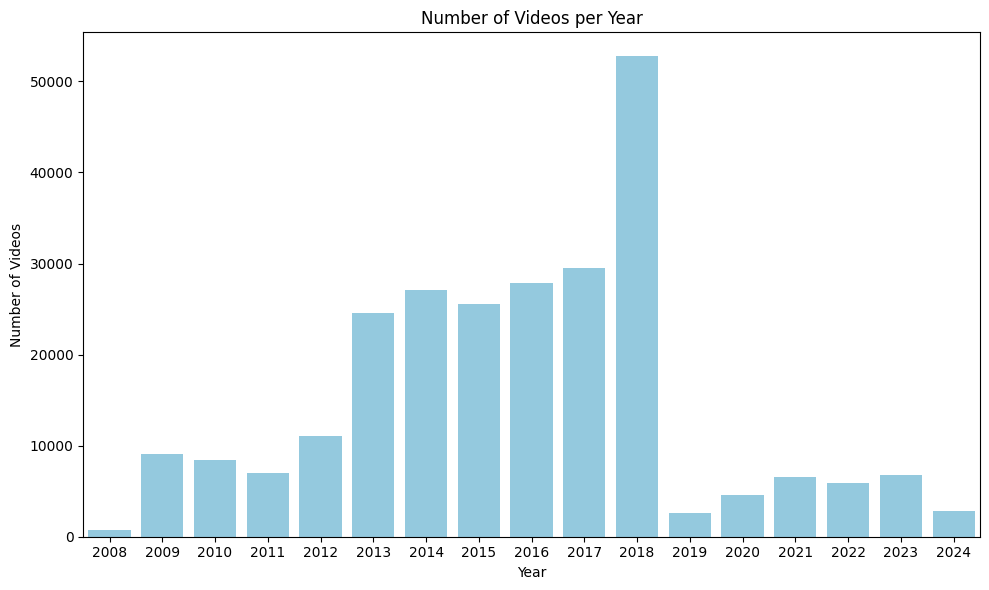

In [7]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year

videos_per_year = df["year"].value_counts().sort_index()

# Plot number of videos per year
plt.figure(figsize=(10, 6))
sns.barplot(
    x=videos_per_year.index.astype(int), y=videos_per_year.values, color="skyblue"
)
plt.xlabel("Year")
plt.ylabel("Number of Videos")
plt.title("Number of Videos per Year")
plt.tight_layout()
plt.savefig(os.path.join(plot_output_path, "videos_per_year.png"), bbox_inches="tight")
plt.show()

In [8]:
# Statistics on the counts (number of videos per year)
mean_count = videos_per_year.mean()
std_count = videos_per_year.std()
min_count = videos_per_year.min()
max_count = videos_per_year.max()

print(f"Minimum videos in a year: {min_count}")
print(f"Maximum videos in a year: {max_count}")
print(f"Mean videos per year: {mean_count:.2f}")
print(f"Standard deviation of videos per year: {std_count:.2f}")

Minimum videos in a year: 763
Maximum videos in a year: 52746
Mean videos per year: 14881.35
Standard deviation of videos per year: 14023.94


#### Adjective noun pairs in titles


In [9]:
# Calculate title lengths
df["title_length"] = df["title"].astype(str).apply(len)

# Get statistics
mean_length = df["title_length"].mean()
median_length = df["title_length"].median()
std_length = df["title_length"].std()
min_length = df["title_length"].min()
max_length = df["title_length"].max()

print(f"Mean title length: {mean_length:.2f}")
print(f"Median title length: {median_length}")
print(f"Standard deviation: {std_length:.2f}")
print(f"Min title length: {min_length}")
print(f"Max title length: {max_length}")

Mean title length: 40.78
Median title length: 39.0
Standard deviation: 17.54
Min title length: 1
Max title length: 102


In [10]:
from src.models import embeddings

embeddings.download_nltk_data()

# Ensure all titles are strings and fill NaN with empty string
df["title"] = df["title"].fillna("").astype(str)

# Apply the function to the title column
df["title_words"] = df["title"].apply(embeddings.clean_tokenize_and_stem)

# Flatten the list of words and count frequencies
all_words = [word for words in df["title_words"] for word in words]
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(most_common_words, columns=["word", "count"])


[nltk_data] Downloading package stopwords to /home/olga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df.title_words

0                           [cute, teen, gloryhol, handjob]
1         [reali, nice, step, mom, angi, give, titjob, g...
2                               [step, mom, gift, son, pov]
3                       [baltimor, street, hooker, creampi]
4                           [cute, blond, brunett, pleasur]
                                ...                        
256121                                      [video, disabl]
256122                                      [famou, youtub]
256123                              [finger, squirt, pussi]
256124    [esposa, le, entrega, el, culo, su, vecino, lo...
256125                 [mädchen, masturbiert, im, solarium]
Name: title_words, Length: 256126, dtype: object

In [12]:
df["title"]

0                               Cute teen gloryhole handjob
1         Realy Nice Step Mom Angie Gives Titjob Good Yo...
2                             Step Mom´s gift for son - pov
3                          Baltimore Street Hooker Creampie
4              Cute Blonde and Brunette Pleasure Each Other
                                ...                        
256121                                       Video Disabled
256122                                of a famous YouTuber!
256123                        Fingering her squirting pussy
256124    Esposa le entrega el culo a su vecino y lo gra...
256125                      MÄDCHEN MASTURBIERT IM SOLARIUM
Name: title, Length: 256126, dtype: object

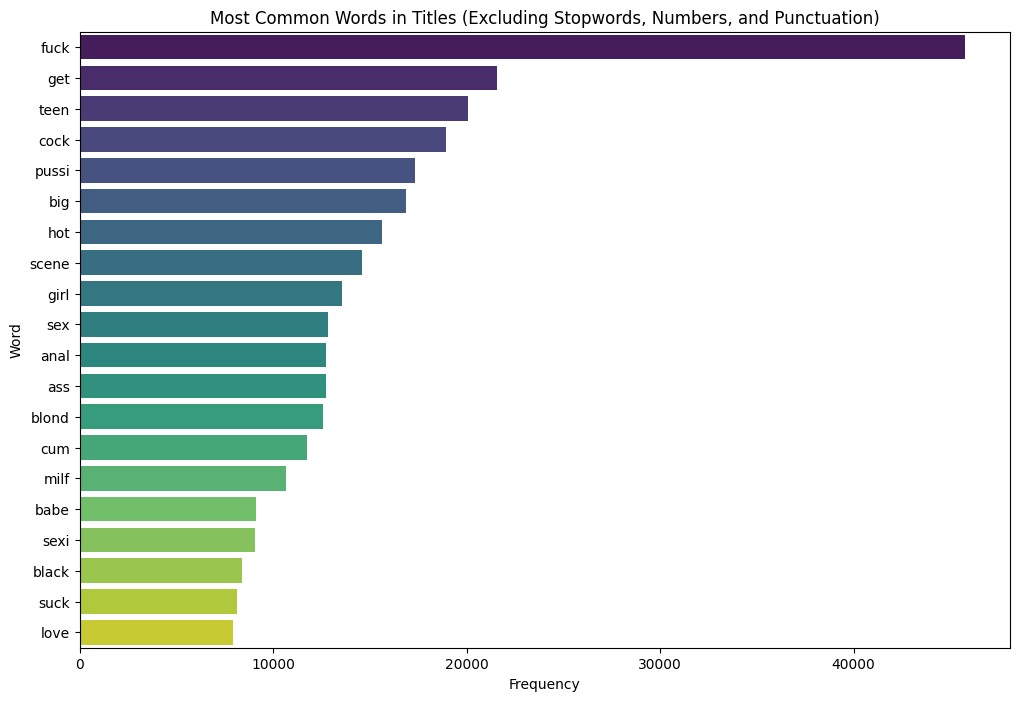

In [13]:
# Plot the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x="count", y="word", data=word_freq_df, hue="word", palette="viridis")
plt.title("Most Common Words in Titles (Excluding Stopwords, Numbers, and Punctuation)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.savefig(
    os.path.join(plot_output_path, "words_titles_frequency_distribution.eps"),
    bbox_inches="tight",
)
plt.show()

### POS tagging


In [14]:
from src.models.extract_adj_noun_pairs import run_pipeline

# Run pipeline and keep everything
df, pair_df = run_pipeline(
    df,
    cache_filename="pos_title_with_deps.pkl",
    output_csv="adjective_noun_pairs.csv",
    return_pair_df=True,
    data_output_path="data/processed",
)


Loading cached POS data...
Saved 30493 adjective–noun pairs to data/processed/adjective_noun_pairs.csv


In [15]:
df.iloc[362].pos_title_with_deps

[('sell', 'VERB', 'ROOT'),
 ('gf', 'PROPN', 'compound'),
 ('limonika', 'NOUN', 'dobj'),
 ('sell', 'VERB', 'dep'),
 ('gf', 'NOUN', 'dobj'),
 ('cuz', 'SCONJ', 'mark'),
 ('want', 'NOUN', 'advcl')]

##### What are the most common adjective–noun pairings in titles?


/tmp/ipykernel_15147/2103876292.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pairs, y="pair_str", x="Count", palette="viridis")


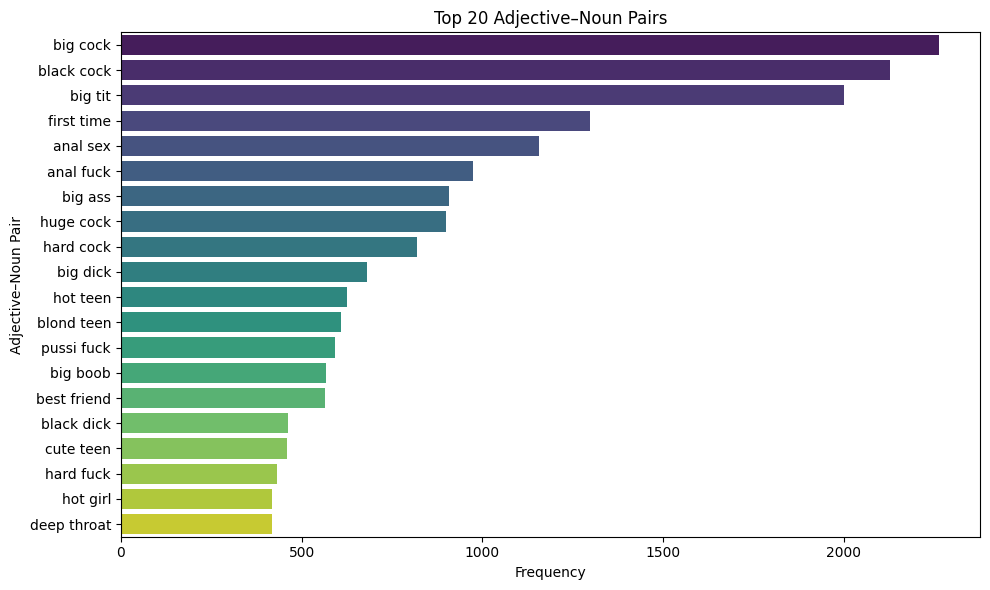

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top N pairs
top_n = 20
top_pairs = pair_df.head(top_n).copy()
top_pairs["pair_str"] = top_pairs["Pair"].apply(lambda x: f"{x[0]} {x[1]}")

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pairs, y="pair_str", x="Count", palette="viridis")
plt.title(f"Top {top_n} Adjective–Noun Pairs")
plt.xlabel("Frequency")
plt.ylabel("Adjective–Noun Pair")
plt.tight_layout()
plt.savefig(
    os.path.join(plot_output_path, "adjective-noun-pair.eps"), bbox_inches="tight"
)
plt.show()


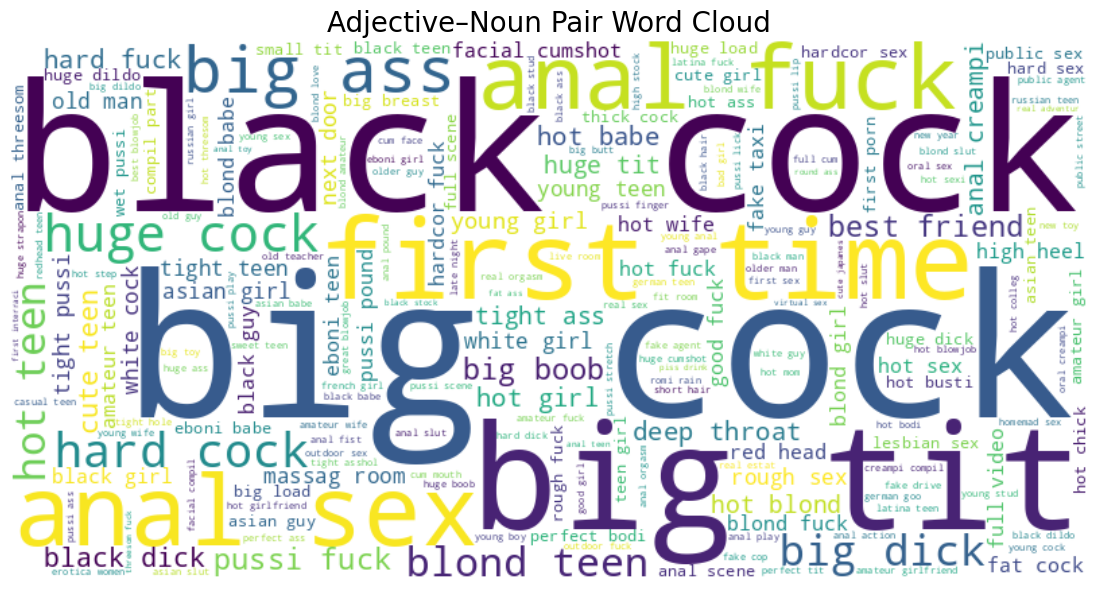

In [17]:
from wordcloud import WordCloud

# Prepare data for word cloud
pair_freq_dict = {
    f"{adj} {noun}": count for (adj, noun), count in pair_df.head(1000).values
}

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(pair_freq_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Adjective–Noun Pair Word Cloud", fontsize=20)
plt.savefig(
    os.path.join(plot_output_path, "adj-noun-pair-word-cloud.eps"), bbox_inches="tight"
)
plt.savefig(
    os.path.join(plot_output_path, "adj-noun-pair-word-cloud.png"), bbox_inches="tight"
)
plt.show()


In [18]:
# Different ways to say pussy..using levenshtein distance

import difflib
from collections import Counter

# Flatten all words from title_words
all_words = [word for words in df["title_words"] for word in words]

# Get unique words to speed up matching
unique_words = set(all_words)

# Find words with high similarity to "pussy"
matches = [
    w for w in unique_words if difflib.SequenceMatcher(None, w, "pussy").ratio() > 0.7
]

# Count their frequencies in the corpus
fuzzy_counts = Counter([w for w in all_words if w in matches])

# Show the most common fuzzy matches
print(fuzzy_counts.most_common(20))

[('pussi', 17338), ('pussylick', 76), ('puss', 62), ('pussyfuck', 26), ('pussyrub', 11), ('pussycat', 11), ('pusssi', 11), ('pussyjob', 9), ('pussyeat', 9), ('pussyman', 7), ('pussykat', 6), ('pussylov', 5), ('pussy_ful', 3), ('pussypov', 2), ('pussysh', 2), ('pussynail', 2), ('pussylici', 2), ('pussyy', 2), ('pussyplay', 2), ('pussylip', 2)]


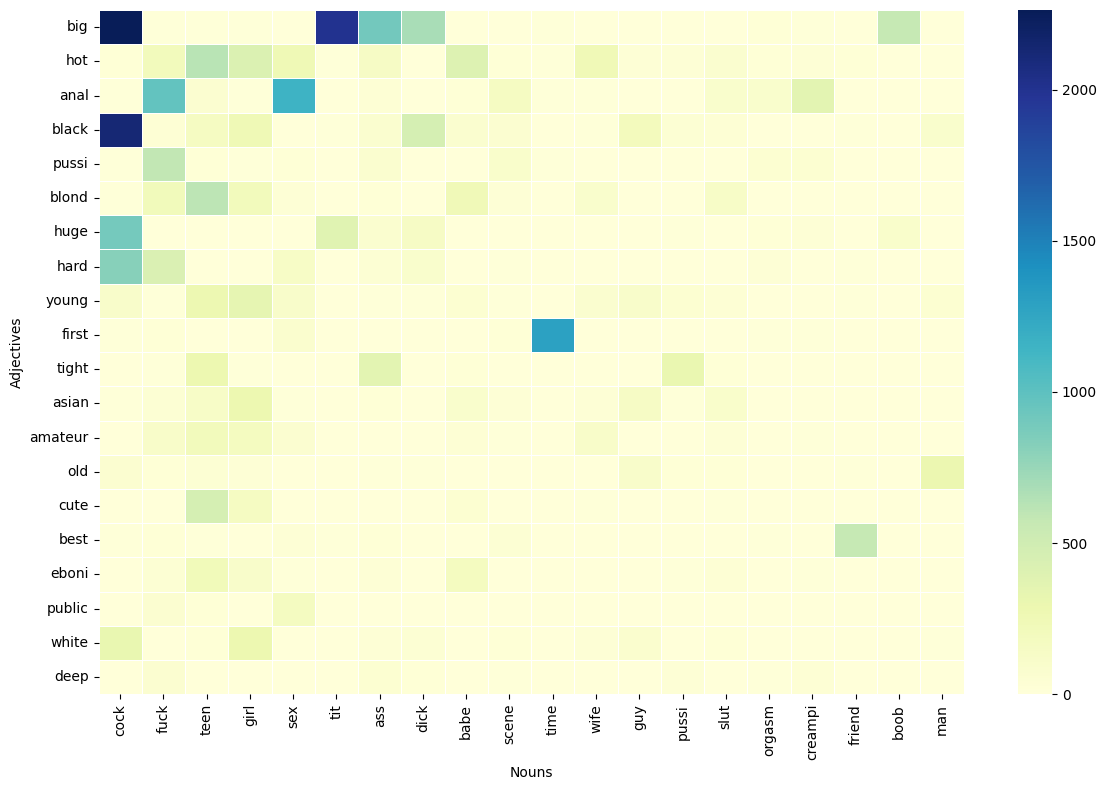

In [19]:
# Create a DataFrame for heatmap: rows = adjectives, cols = nouns

heat_df = pair_df.copy()
heat_df["Adjective"] = heat_df["Pair"].apply(lambda x: x[0])
heat_df["Noun"] = heat_df["Pair"].apply(lambda x: x[1])

pivot = heat_df.pivot_table(
    index="Adjective", columns="Noun", values="Count", fill_value=0
)
pivot_top = pivot.loc[
    pivot.sum(axis=1).sort_values(ascending=False).head(20).index,  # top 20 adjectives
    pivot.sum().sort_values(ascending=False).head(20).index,
]  # top 20 nouns

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_top, cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Nouns")
plt.ylabel("Adjectives")
plt.tight_layout()
plt.savefig(
    os.path.join(plot_output_path, "heatmap-adj-noun-pair.eps"), bbox_inches="tight"
)
plt.savefig(
    os.path.join(plot_output_path, "heatmap-adj-noun-pair.png"), bbox_inches="tight"
)
plt.show()


In [20]:
# Save the DataFrame with adjective-noun pairs to a CSV file
adjective_noun_df = pd.DataFrame(
    pair_df["Pair"].tolist(), columns=["Adjective", "Noun"]
)
adjective_noun_df["Count"] = pair_df["Count"].values
adjective_noun_df.to_csv("data/processed/adjective_noun_pairs_split.csv", index=False)

# Count total occurrences of each noun in adjective–noun pairs
noun_counts = (
    adjective_noun_df.groupby("Noun")["Count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
noun_counts.columns = ["Noun", "Total_Count"]
noun_counts.to_csv("data/processed/noun_counts.csv", index=False)

# Count total occurrences of each adjective in adjective–noun pairs

adjective_counts = (
    adjective_noun_df.groupby("Adjective")["Count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
adjective_counts.columns = ["Adjective", "Total_Count"]
adjective_counts.to_csv("data/processed/adjective_counts.csv", index=False)

adjective_counts


,Adjective,Total_Count
0,big,8007
1,hot,7159
2,anal,6834
3,black,5921
4,pussi,3723
...,...,...
3647,日目人妻がライブチャットしてたら連続潮吹きイキすぎて気持ちよかった個人撮影live,1
3648,平台约的妹子,1
3649,小鸟酱写頁,1
3650,女子大生tバックのみでm字オナニーfemal,1


##### Heatmap for selected nouns


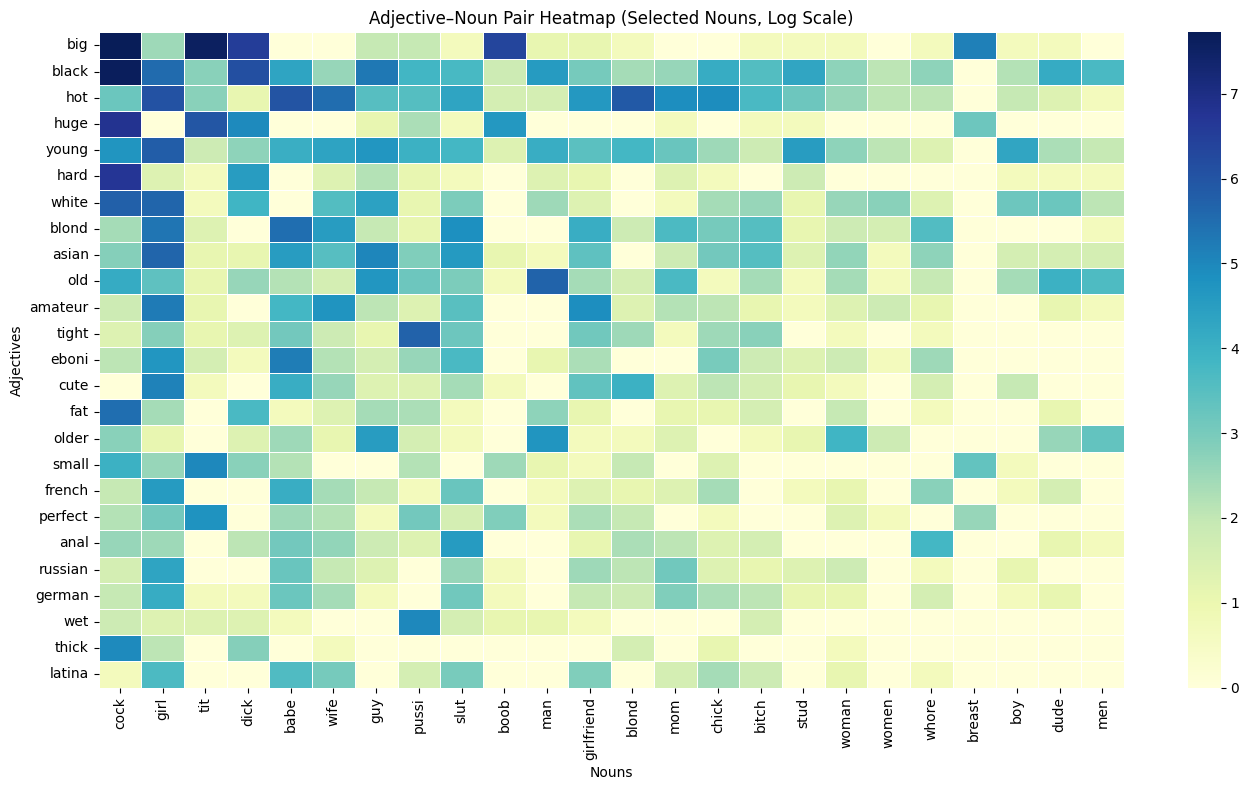

Log scale to original scale mapping (log1p):
log1p: 0.0 -> original: 0.0
log1p: 1.0 -> original: 1.7
log1p: 2.0 -> original: 6.4
log1p: 3.0 -> original: 19.1
log1p: 4.0 -> original: 53.6
log1p: 5.0 -> original: 147.4
log1p: 6.0 -> original: 402.4
log1p: 7.0 -> original: 1095.6


In [21]:
import numpy as np

# Heatmap for selected nouns (log scale)

selected_nouns = [
    "cock",
    "girl",
    "tit",
    "dick",
    "babe",
    "wife",
    "guy",
    "pussi",
    "slut",
    "boob",
    "man",
    "girlfriend",
    "blond",
    "mom",
    "chick",
    "bitch",
    "stud",
    "woman",
    "women",
    "whore",
    "breast",
    "readhead",
    "boy",
    "dude",
    "men",
]

heat_df = pair_df.copy()
heat_df["Adjective"] = heat_df["Pair"].apply(lambda x: x[0])
heat_df["Noun"] = heat_df["Pair"].apply(lambda x: x[1])

pivot = heat_df.pivot_table(
    index="Adjective", columns="Noun", values="Count", fill_value=0
)
present_nouns = [noun for noun in selected_nouns if noun in pivot.columns]
pivot_selected = pivot[present_nouns]

# Show only the top 25 adjectives (by total count across selected nouns)
top_n_adjs = 25
pivot_selected = pivot_selected.loc[
    pivot_selected.sum(axis=1).sort_values(ascending=False).head(top_n_adjs).index
]

# Apply log1p (log(1+x)) to avoid log(0)
pivot_log = np.log1p(pivot_selected)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_log, cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Nouns")
plt.ylabel("Adjectives")
plt.title("Adjective–Noun Pair Heatmap (Selected Nouns, Log Scale)")
plt.tight_layout()
plt.savefig(
    os.path.join(plot_output_path, "heatmap_selected_nouns_log.png"),
    bbox_inches="tight",
)
plt.show()

# Conversion from log scale (0 to 7) back to original scale
log_values = np.arange(0, 7.1, 1)  # 0, 1, ..., 7
original_values = np.expm1(log_values)
print("Log scale to original scale mapping (log1p):")
for log_v, orig_v in zip(log_values, original_values):
    print(f"log1p: {log_v:.1f} -> original: {orig_v:.1f}")

##### Heatmap for selected adjectives


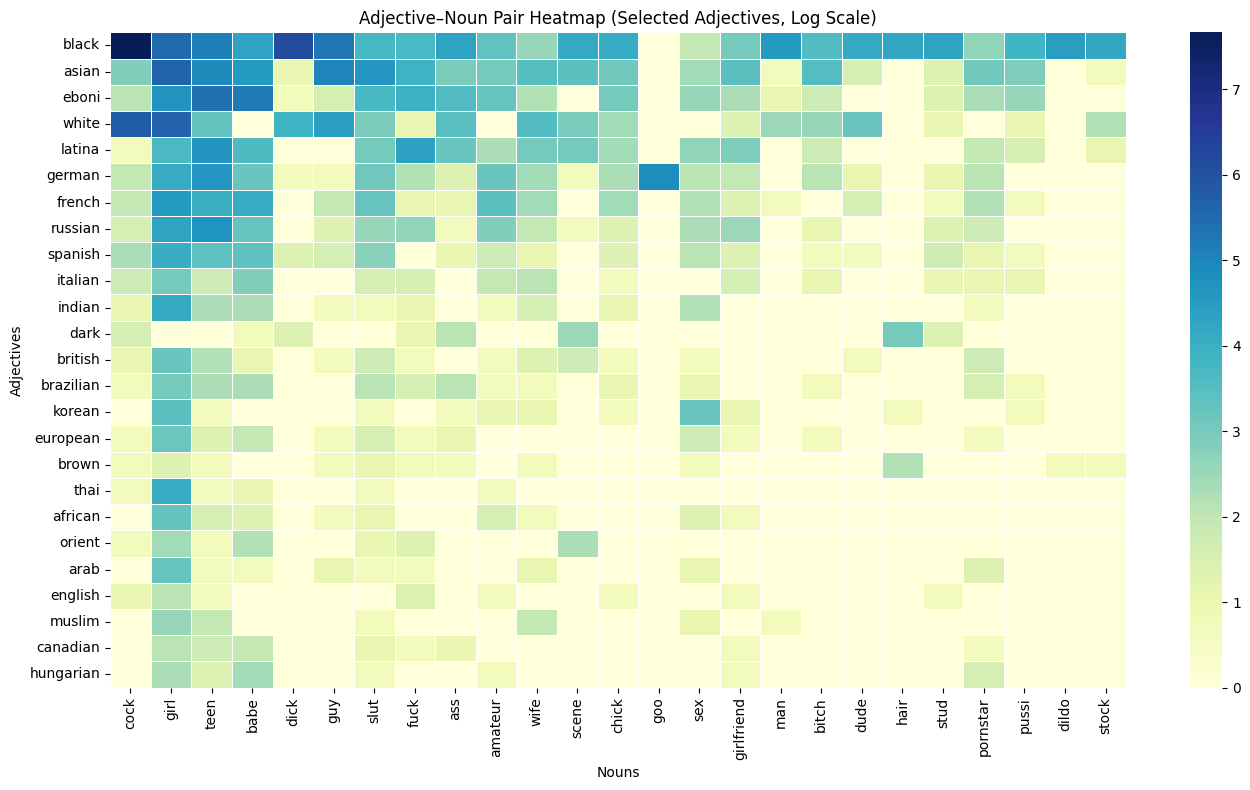

Log scale to original scale mapping (log1p):
log1p: 0.0 -> original: 0.0
log1p: 1.0 -> original: 1.7
log1p: 2.0 -> original: 6.4
log1p: 3.0 -> original: 19.1
log1p: 4.0 -> original: 53.6
log1p: 5.0 -> original: 147.4
log1p: 6.0 -> original: 402.4
log1p: 7.0 -> original: 1095.6


In [22]:
import numpy as np

selected_adjectives = [
    "black",
    "asian",
    "eboni",
    "white",
    "latina",
    "german",
    "french",
    "russian",
    "spanish",
    "italian",
    "indian",
    "dark",
    "british",
    "brazilian",
    "korean",
    "european",
    "brown",
    "thai",
    "african",
    "orient",
    "arab",
    "english",
    "muslim",
    "canadian",
    "hungarian",
]

# Prepare the heatmap DataFrame
heat_df = pair_df.copy()
heat_df["Adjective"] = heat_df["Pair"].apply(lambda x: x[0])
heat_df["Noun"] = heat_df["Pair"].apply(lambda x: x[1])

pivot = heat_df.pivot_table(
    index="Adjective", columns="Noun", values="Count", fill_value=0
)
present_adjs = [adj for adj in selected_adjectives if adj in pivot.index]
pivot_selected = pivot.loc[present_adjs]

# Optionally, show only the top N nouns (by total count across selected adjectives)
top_n_nouns = 25
pivot_selected = pivot_selected.loc[
    :, pivot_selected.sum(axis=0).sort_values(ascending=False).head(top_n_nouns).index
]

# Apply log1p (log(1+x)) to avoid log(0)
pivot_log = np.log1p(pivot_selected)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_log, cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Nouns")
plt.ylabel("Adjectives")
plt.title("Adjective–Noun Pair Heatmap (Selected Adjectives, Log Scale)")
plt.tight_layout()
plt.savefig(
    os.path.join(plot_output_path, "heatmap_selected_adjectives_log.png"),
    bbox_inches="tight",
)
plt.show()

# Conversion from log scale (0 to 7) back to original scale
log_values = np.arange(0, 7.1, 1)  # 0, 1, ..., 7
original_values = np.expm1(log_values)
print("Log scale to original scale mapping (log1p):")
for log_v, orig_v in zip(log_values, original_values):
    print(f"log1p: {log_v:.1f} -> original: {orig_v:.1f}")

### Network analysis of adjective-noun pairs


#### Top Male and Female adjective-noun networks

In [23]:
pair_df

,Pair,Count
75,"(big, cock)",2263
107,"(black, cock)",2128
28,"(big, tit)",1999
37,"(first, time)",1298
281,"(anal, sex)",1156
...,...,...
14828,"(school_ful, movi)",1
14824,"(offic, upskirt)",1
14822,"(asian, date)",1
14791,"(bionic, woman)",1


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os


def plot_adj_noun_graph(
    pair_df,
    noun_list,
    top_nouns=20,
    top_k_adjs_per_noun=5,
    output_file=None,
    seed=42,
):
    """
    Plot a bipartite graph of adjective–noun pairings and print centrality stats.

    Parameters:
    - pair_df: DataFrame with columns ["Pair", "Count"]
    - noun_list: List or set of nouns to filter
    - top_nouns: Number of top nouns to visualize (by total pair frequency)
    - top_k_adjs_per_noun: Number of top adjectives to keep per noun
    - output_file: If provided, saves plot to this path
    - seed: Random seed for layout
    """

    # Unpack pairs into separate columns
    df = pair_df.copy()
    df[["adjective", "noun"]] = df["Pair"].apply(pd.Series)

    # Filter to noun subset (e.g., FEMALE_NOUNS or MALE_NOUNS)
    df = df[df["noun"].isin(noun_list)]

    # Keep only top-k adjectives per noun
    df = (
        df.sort_values("Count", ascending=False)
        .groupby("noun")
        .head(top_k_adjs_per_noun)
        .reset_index(drop=True)
    )

    # Select top N most frequent nouns overall
    top_noun_counts = (
        df.groupby("noun")["Count"]
        .sum()
        .sort_values(ascending=False)
        .head(top_nouns)
        .index
    )
    min_count = 50
  
    top_pairs = df[df["noun"].isin(top_noun_counts)]

    # --- Build Graph ---
    G = nx.Graph()

    # Add noun nodes
    for noun in top_pairs["noun"].unique():
        G.add_node(noun, type="noun", color="lightblue", size=1000)

    # Add adjective nodes with size scaled by total usage
    adj_counts = top_pairs.groupby("adjective")["Count"].sum().to_dict()
    for adj, count in adj_counts.items():
        size = np.log1p(count) * 150
        G.add_node(adj, type="adj", color="lightcoral", size=size)

    # Add edges (unweighted visually, but store weight for analysis)
    for _, row in top_pairs.iterrows():
        G.add_edge(row["adjective"], row["noun"], weight=row["Count"])

    # --- Centrality Analysis ---
    deg_cent = nx.degree_centrality(G)
    weighted_deg = dict(G.degree(weight="weight"))

    print("\nTop Adjectives by Degree Centrality:")
    for node, centrality in sorted(deg_cent.items(), key=lambda x: -x[1]):
        if G.nodes[node]["type"] == "adj":
            print(f"{node}: {centrality:.3f}")

    print("\nTop Adjectives by Weighted Degree (Sum of Co-occurrence Counts):")
    for node, wdeg in sorted(weighted_deg.items(), key=lambda x: -x[1]):
        if G.nodes[node]["type"] == "adj":
            print(f"{node}: {wdeg}")

    # --- Draw Graph ---
    pos = nx.spring_layout(G, k=7, iterations=300, seed=seed)

    node_colors = [G.nodes[n]["color"] for n in G.nodes()]
    node_sizes = [G.nodes[n].get("size", 1000) for n in G.nodes()]

    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color="gray")

    nx.draw_networkx_labels(
        G,
        pos,
        font_size=8,
        bbox=dict(
            facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2"
        ),
    )

    plt.axis("off")
    plt.tight_layout()

    if output_file:
        plt.savefig(
            os.path.join(plot_output_path, output_file),
            bbox_inches="tight",
        )
    plt.show()



Top Adjectives by Degree Centrality:
hot: 0.286
blond: 0.245
young: 0.224
asian: 0.163
black: 0.143
teen: 0.122
big: 0.082
amateur: 0.061
cute: 0.061
french: 0.061
huge: 0.061
perfect: 0.061
small: 0.061
tight: 0.061
white: 0.061
anal: 0.041
eboni: 0.041
german: 0.041
best: 0.020
erotica: 0.020
fake: 0.020
new: 0.020
nice: 0.020
old: 0.020
other: 0.020
pink: 0.020
porn: 0.020
russian: 0.020
taboo: 0.020
twin: 0.020
wet: 0.020

Top Adjectives by Weighted Degree (Sum of Co-occurrence Counts):
big: 2744
hot: 2379
teen: 2276
blond: 1290
young: 888
tight: 605
asian: 595
cute: 510
huge: 507
black: 448
white: 336
amateur: 259
eboni: 201
small: 183
perfect: 148
wet: 147
anal: 141
erotica: 111
pink: 64
other: 56
fake: 49
porn: 46
old: 40
french: 32
russian: 22
german: 18
nice: 13
twin: 11
new: 7
taboo: 6
best: 2


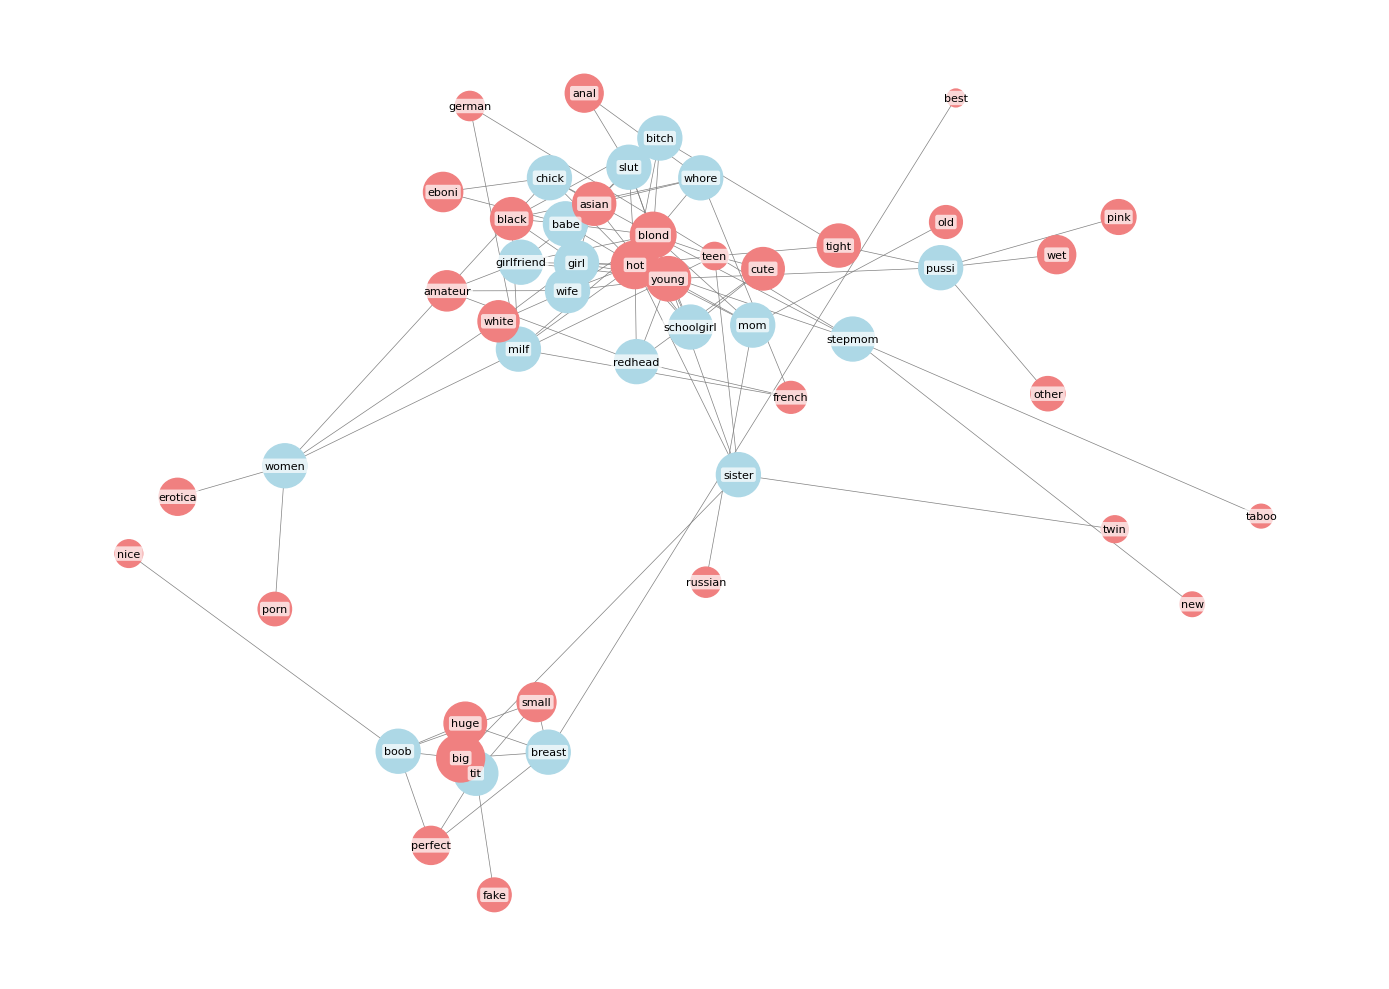


Top Adjectives by Degree Centrality:
black: 0.263
old: 0.140
young: 0.140
older: 0.105
white: 0.105
big: 0.088
hot: 0.088
hard: 0.070
muscular: 0.070
younger: 0.053
blond: 0.035
huge: 0.035
new: 0.035
real: 0.035
anal: 0.018
asian: 0.018
australian: 0.018
bad: 0.018
better: 0.018
classic: 0.018
creampi: 0.018
cuckold: 0.018
cum: 0.018
cute: 0.018
dutch: 0.018
enough: 0.018
facial: 0.018
front: 0.018
good: 0.018
kendal: 0.018
morn: 0.018
nake: 0.018
outdoor: 0.018
quick: 0.018
servic: 0.018
stripper: 0.018
threesom: 0.018
tight: 0.018

Top Adjectives by Weighted Degree (Sum of Co-occurrence Counts):
black: 3126
big: 2985
huge: 1044
hard: 925
old: 536
white: 418
young: 353
older: 255
asian: 150
front: 48
hot: 47
younger: 41
classic: 30
muscular: 27
new: 22
bad: 20
facial: 16
blond: 14
good: 12
cute: 11
real: 11
creampi: 10
cuckold: 9
morn: 9
kendal: 8
better: 6
stripper: 6
anal: 4
cum: 3
enough: 3
nake: 3
outdoor: 3
australian: 2
quick: 2
tight: 2
dutch: 1
servic: 1
threesom: 1


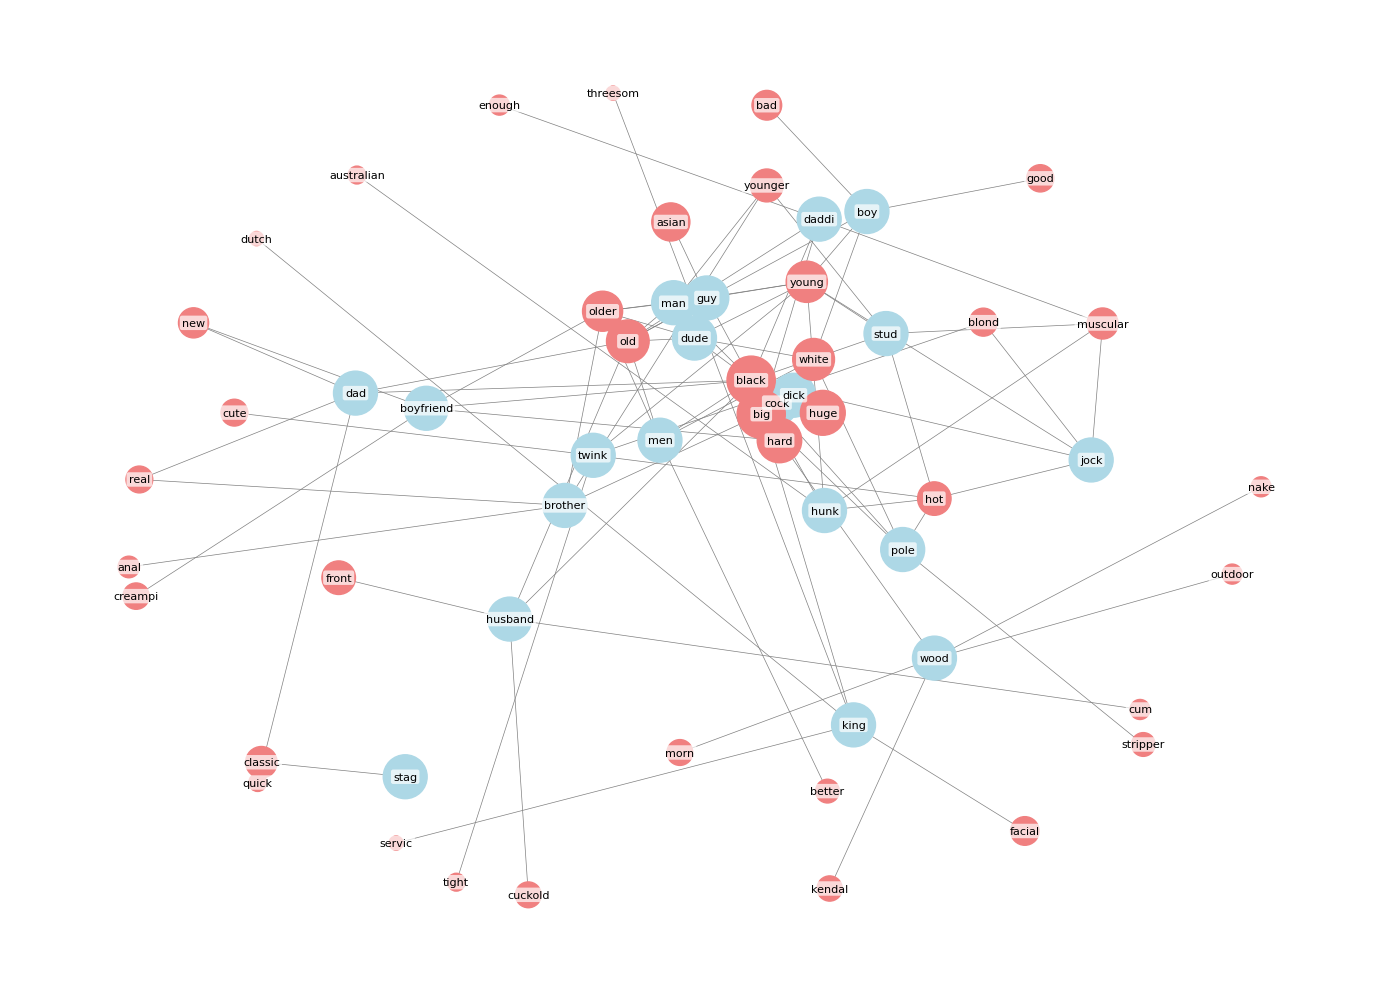

In [25]:
plot_adj_noun_graph(
    pair_df=pair_df,
    noun_list=FEMALE_NOUNS,
    top_nouns=20,
    top_k_adjs_per_noun=5,
    output_file="female-adj-noun-graph.png",
)
plot_adj_noun_graph(
    pair_df=pair_df,
    noun_list=MALE_NOUNS,
    top_nouns=20,
    top_k_adjs_per_noun=5,
    output_file="male-adj-noun-graph.png",
)


In [26]:
df.pos_title_with_deps

0         [(cute, ADJ, amod), (teen, NOUN, compound), (g...
1         [(reali, PROPN, amod), (nice, ADJ, amod), (ste...
2         [(step, NOUN, ROOT), (mom, NOUN, compound), (g...
3         [(baltimor, PROPN, compound), (street, PROPN, ...
4         [(cute, ADJ, amod), (blond, PROPN, compound), ...
                                ...                        
256121      [(video, NOUN, compound), (disabl, NOUN, ROOT)]
256122           [(famou, ADJ, amod), (youtub, NOUN, ROOT)]
256123    [(finger, NOUN, compound), (squirt, PROPN, com...
256124    [(esposa, PROPN, compound), (le, PROPN, compou...
256125    [(mädchen, ADV, advmod), (masturbiert, VERB, R...
Name: pos_title_with_deps, Length: 256126, dtype: object

In [27]:
# Extract data underliyng the graphs
import pandas as pd

# Unpack pairs into separate columns
dat = pair_df.copy()
dat[["adjective", "noun"]] = dat["Pair"].apply(pd.Series)


# Helper function to extract top 5 adjectives with counts per noun
def extract_top_adjectives(df_subset, noun_set):
    filtered = df_subset[df_subset["noun"].isin(noun_set)].copy()
    grouped = filtered.groupby(["noun", "adjective"])["Count"].sum().reset_index()

    results = []
    for noun in grouped["noun"].unique():
        sub_df = grouped[grouped["noun"] == noun]
        top5 = sub_df.sort_values("Count", ascending=False).head(5)
        adj_string = ", ".join(
            f"{adj} ({cnt})" for adj, cnt in zip(top5["adjective"], top5["Count"])
        )
        results.append({"noun": noun, "top_adjectives": adj_string})

    return pd.DataFrame(results).sort_values("noun").reset_index(drop=True)


# Female and Male tables
female_table = extract_top_adjectives(dat, FEMALE_NOUNS)
male_table = extract_top_adjectives(dat, MALE_NOUNS)

female_table.to_csv(
    os.path.join(data_output_path, "top_adjectives_female.csv"), index=False
)
male_table.to_csv(
    os.path.join(data_output_path, "top_adjectives_male.csv"), index=False
)


#### Top racialized adjectives that describe nouns


In [28]:
# extract data for racialized adjectives

import pandas as pd

# Unpack pair column into adjective and noun
dat = pair_df.copy()
dat[["adjective", "noun"]] = dat["Pair"].apply(pd.Series)

# Filter rows where adjective is in RACIALIZED_TERMS
racial_df = dat[dat["adjective"].isin(RACIALIZED_TERMS)].copy()

# Group by adjective and noun, summing counts
grouped_race = racial_df.groupby(["adjective", "noun"])["Count"].sum().reset_index()


# Extract top N nouns for each racialized adjective
def extract_top_nouns(df, top_n=5):
    results = []
    for adj in df["adjective"].unique():
        sub_df = df[df["adjective"] == adj]
        top_nouns = sub_df.sort_values("Count", ascending=False).head(top_n)
        noun_string = ", ".join(
            f"{noun} ({cnt})"
            for noun, cnt in zip(top_nouns["noun"], top_nouns["Count"])
        )
        results.append({"adjective": adj, "top_nouns": noun_string})
    return pd.DataFrame(results).sort_values("adjective").reset_index(drop=True)


# Generate the table
racial_adjective_table = extract_top_nouns(grouped_race, top_n=5)

# Display or export
print("=== Top Nouns Associated with Racialized Adjectives ===")
display(racial_adjective_table)

# Optional: Export
racial_adjective_table.to_csv(
    os.path.join(data_output_path, "racial_adjective_noun_table.csv"), index=False
)


=== Top Nouns Associated with Racialized Adjectives ===


,adjective,top_nouns
0,african,"girl (26), amateur (4), teen (4), babe (3), se..."
1,arab,"girl (25), pornstar (3), guy (2), sex (2), ana..."
2,asian,"girl (283), guy (150), teen (132), slut (100),..."
3,black,"cock (2128), dick (463), girl (251), guy (197)..."
4,brazilian,"girl (19), babe (9), teen (9), ass (7), slut (7)"
5,british,"girl (24), sub (10), teen (8), heat (6), scene..."
6,brown,"eye (11), sugar (11), hair (8), skin (4), girl..."
7,canadian,"girl (7), babe (6), teen (5), slut (2), touris..."
8,dark,"meat (32), hair (19), skin (16), scene (11), s..."
9,eboni,"teen (223), babe (182), girl (107), fuck (52),..."



Top Racialized Adjectives by Unweighted Degree Centrality:
black: 0.505
eboni: 0.233
latina: 0.197
french: 0.119
russian: 0.106
white: 0.104
spanish: 0.085
italian: 0.061
british: 0.049
indian: 0.040
brown: 0.037
dark: 0.037
european: 0.033
korean: 0.025
african: 0.022
orient: 0.019
thai: 0.013

Top Racialized Adjectives by Weighted Degree (Sum of Co-occurrence Counts):
black: 5923
eboni: 1244
white: 1185
latina: 797
french: 557
russian: 520
spanish: 303
italian: 164
indian: 151
dark: 145
british: 130
korean: 108
european: 82
brown: 79
thai: 72
african: 65
orient: 54


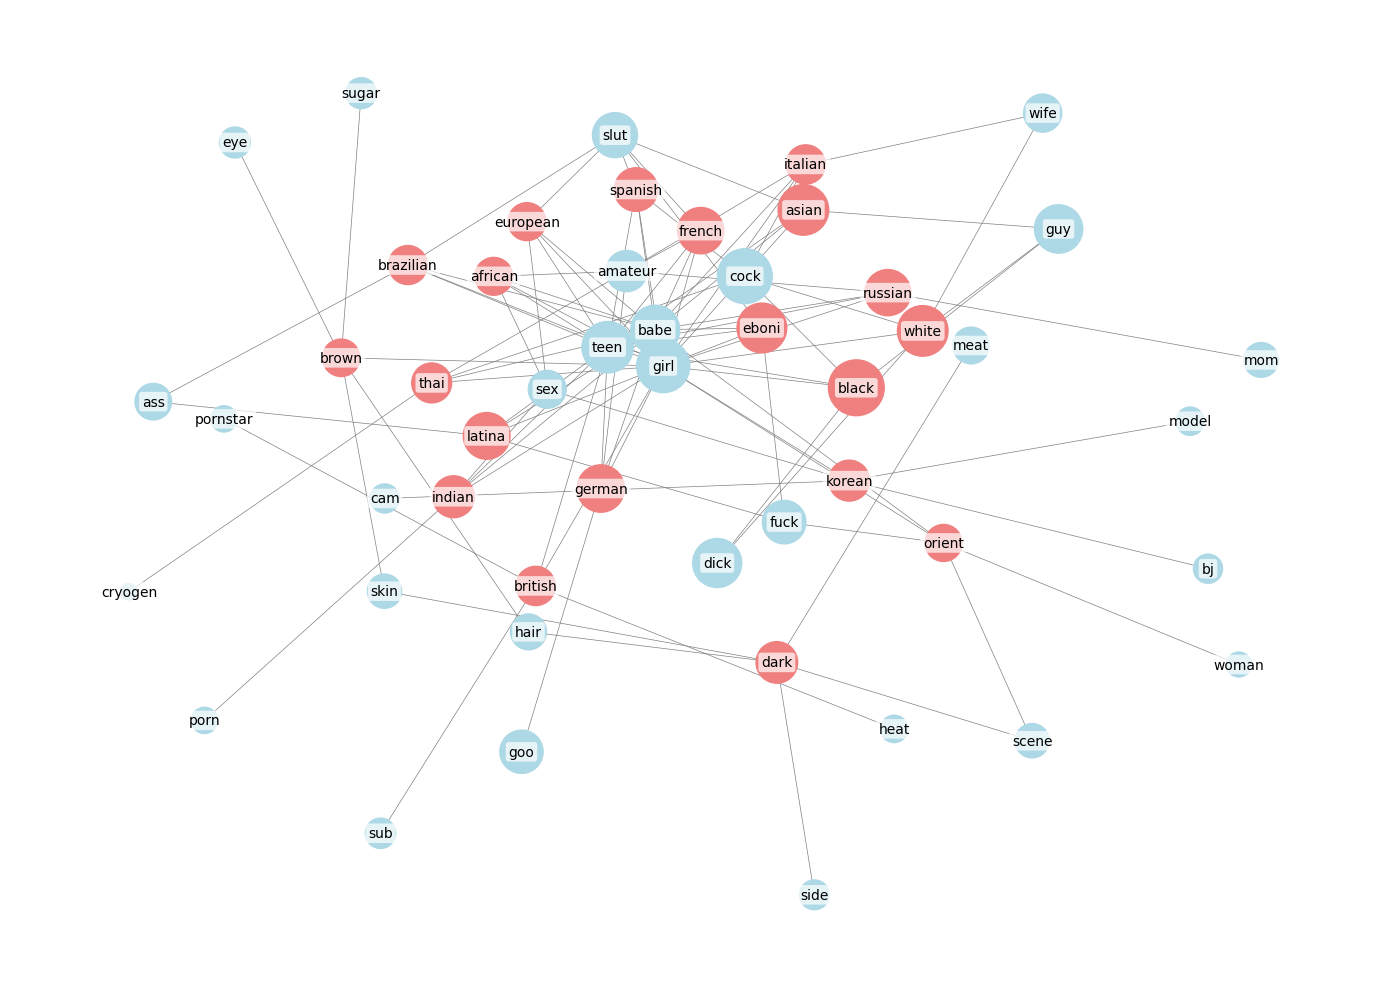

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os


top_adjs = (
    grouped_race.groupby("adjective")["Count"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

top_racial_pairs = (
    grouped_race[grouped_race["adjective"].isin(top_adjs)]
    .sort_values(["adjective", "Count"], ascending=[True, False])
    .groupby("adjective")
    .head(5)
    .reset_index(drop=True)
)


analysis_data = grouped_race[grouped_race["adjective"].isin(top_adjs)].copy()


G_analysis = nx.Graph()
for _, row in analysis_data.iterrows():
    G_analysis.add_edge(row["adjective"], row["noun"], weight=row["Count"])
    G_analysis.nodes[row["adjective"]]["type"] = "adj"
    G_analysis.nodes[row["noun"]]["type"] = "noun"


deg_cent = nx.degree_centrality(G_analysis)
weighted_deg = dict(G_analysis.degree(weight="weight"))


print("\nTop Racialized Adjectives by Unweighted Degree Centrality:")
for node, centrality in sorted(deg_cent.items(), key=lambda x: -x[1]):
    if G_analysis.nodes[node]["type"] == "adj":
        print(f"{node}: {centrality:.3f}")

print("\nTop Racialized Adjectives by Weighted Degree (Sum of Co-occurrence Counts):")
for node, wdeg in sorted(weighted_deg.items(), key=lambda x: -x[1]):
    if G_analysis.nodes[node]["type"] == "adj":
        print(f"{node}: {wdeg}")


G_visual = nx.Graph()


adj_counts = top_racial_pairs.groupby("adjective")["Count"].sum().to_dict()
for adj in top_racial_pairs["adjective"].unique():
    size = np.log1p(adj_counts.get(adj, 1)) * 200
    G_visual.add_node(adj, type="adj", color="lightcoral", size=size)


noun_counts = top_racial_pairs.groupby("noun")["Count"].sum().to_dict()
for noun in top_racial_pairs["noun"].unique():
    size = np.log1p(noun_counts.get(noun, 1)) * 200
    G_visual.add_node(noun, type="noun", color="lightblue", size=size)


for _, row in top_racial_pairs.iterrows():
    G_visual.add_edge(row["adjective"], row["noun"])


pos = nx.spring_layout(G_visual, k=3, iterations=300, seed=42)

node_colors = [G_visual.nodes[n]["color"] for n in G_visual.nodes()]
node_sizes = [G_visual.nodes[n]["size"] for n in G_visual.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G_visual, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G_visual, pos, width=0.5, edge_color="gray")
nx.draw_networkx_labels(
    G_visual,
    pos,
    font_size=10,
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.2"),
)

plt.axis("off")
plt.tight_layout()
plt.savefig(
    os.path.join(plot_output_path, "racialized-adj-noun-graph.png"),
    bbox_inches="tight",
)
plt.show()


### Small vs large 

In [30]:
# Do descriptions of female performers rely more heavily on adjectives (small)  than
# descriptions of male performers (e.g. large)?

from src.models.qualitative_adj_noun_analysis import analyze_adj_noun_categories

labeled_df, female_props, male_props = analyze_adj_noun_categories(
    pair_df,
    SMALL_ADJECTIVES,
    LARGE_ADJECTIVES,
    "small",
    "large",
    FEMALE_NOUNS,
    MALE_NOUNS,
    group1_label="Female Nouns",
    group2_label="Male Nouns",
)


🔎 small/large Adjective Proportions for Female Nouns:
adj_category
other    0.803020
large    0.149951
small    0.047029

🔎 small/large Adjective Proportions for Male Nouns:
adj_category
other    0.676603
large    0.316314
small    0.007083

📊 Chi-squared Test for small/large Adjective Bias:
χ² = 1700.73, p = 0.0000 (significant)


We analyzed the co-occurrence of size-related adjectives with gendered nouns in video titles to test whether female-associated nouns are more often modified by “small” adjectives and male-associated nouns by “large” adjectives. The majority of adjective–noun pairs fell into the “other” category (female: 80.3%, male: 67.7%), but size descriptors still accounted for a meaningful proportion of cases.

For female nouns, 4.7% of pairs used “small” adjectives, compared to only 0.7% for male nouns. Conversely, “large” adjectives were applied to 31.6% of male nouns but only 15.0% of female nouns. A chi-squared test confirmed that this difference in distribution is highly significant (χ² = 1700.73, p < 0.001).

These findings demonstrate a systematic bias in size-related descriptors: female performers are disproportionately described as “small,” while male performers are disproportionately described as “large.”


In [31]:
# Show top "other" adjective–noun pairs for female nouns
print("Top 'other' adjective–noun pairs for female nouns:")
female_other = (
    labeled_df[
        (labeled_df["adj_category"] == "other")
        & (labeled_df["noun"].isin(FEMALE_NOUNS))
    ]
    .groupby(["adjective", "noun"])["Count"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)
display(female_other)

# Show top "other" adjective–noun pairs for male nouns
print("\nTop 'other' adjective–noun pairs for male nouns:")
male_other = (
    labeled_df[
        (labeled_df["adj_category"] == "other") & (labeled_df["noun"].isin(MALE_NOUNS))
    ]
    .groupby(["adjective", "noun"])["Count"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)
display(male_other)

Top 'other' adjective–noun pairs for female nouns:


,adjective,noun,Count
0,hot,teen,626
1,blond,teen,609
2,cute,teen,460
3,hot,girl,419
4,hot,babe,405
5,young,girl,336
6,white,girl,286
7,asian,girl,283
8,young,teen,281
9,black,girl,251



Top 'other' adjective–noun pairs for male nouns:


,adjective,noun,Count
0,black,cock,2128
1,hard,cock,819
2,black,dick,463
3,white,cock,312
4,old,man,294
5,fat,cock,237
6,black,guy,197
7,asian,guy,150
8,older,man,112
9,young,cock,110


### Appearance vs roles adjectives

In [32]:
# Do descriptions of female performers rely more heavily on adjectives (e.g., appearance) than
# descriptions of male performers (e.g., roles or actions)?

labeled_df, female_props, male_props = analyze_adj_noun_categories(
    pair_df,
    APPEARANCE_ADJECTIVES,
    ROLE_ACTION_ADJECTIVES,
    "appearance",
    "role",
    FEMALE_NOUNS,
    MALE_NOUNS,
    group1_label="Female Nouns",
    group2_label="Male Nouns",
)


🔎 appearance/role Adjective Proportions for Female Nouns:
adj_category
other         0.768994
appearance    0.149194
role          0.081812

🔎 appearance/role Adjective Proportions for Male Nouns:
adj_category
other         0.947908
role          0.040212
appearance    0.011879

📊 Chi-squared Test for appearance/role Adjective Bias:
χ² = 2178.87, p = 0.0000 (significant)



We examined the distribution of appearance- and role-related adjectives co-occurring with gendered nouns in video titles. Among adjective–noun pairs with female nouns, 14.9% used appearance adjectives and 8.2% used role adjectives, while the majority (76.9%) fell into the “other” category. For male nouns, appearance adjectives were extremely rare (1.2%), with role adjectives accounting for 4.0% and “other” adjectives for 94.8%.

A chi-squared test confirmed a highly significant difference in the distribution of appearance and role adjectives across gendered nouns (χ² = 2178.87, p < 0.001). These results indicate that appearance-based descriptors are disproportionately associated with female nouns, while role-related adjectives, though less common overall, are relatively more likely to occur with male nouns.

### Youth vs mature


In [85]:
labeled_df, female_props, male_props = analyze_adj_noun_categories(
    pair_df,
    MATURE_ADJECTIVES,
    YOUTH_ADJECTIVES,
    "mature",
    "youthful",
    FEMALE_NOUNS,
    MALE_NOUNS,
    group1_label="Female Nouns",
    group2_label="Male Nouns",
)



🔎 mature/youthful Adjective Proportions for Female Nouns:
adj_category
other       0.894228
youthful    0.103812
mature      0.001960

🔎 mature/youthful Adjective Proportions for Male Nouns:
adj_category
other       0.925773
youthful    0.053125
mature      0.021102

📊 Chi-squared Test for mature/youthful Adjective Bias:
χ² = 603.47, p = 0.0000 (significant)


### Black vs white

In [59]:
# Filter for "black cock" and "white cock" pairs

# Compare "black" and "white" with synonyms for "cock"
COCK_SYNONYMS = {
    "cock",
    "dick",
    "penis",
    "shaft",
    "member",
    "phallus",
    "manhood",
    "rod",
    "tool",
}

black_syn = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] == "black" and x[1] in COCK_SYNONYMS)
]
white_syn = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] == "white" and x[1] in COCK_SYNONYMS)
]

print("Black + [cock synonyms] counts:")
display(black_syn[["Pair", "Count"]])

print("\nWhite + [cock synonyms] counts:")
display(white_syn[["Pair", "Count"]])

Black + [cock synonyms] counts:


,Pair,Count
107,"(black, cock)",2128
66,"(black, dick)",463
13660,"(black, rod)",19
1688,"(black, shaft)",5
11915,"(black, member)",4
24154,"(black, penis)",1
8600,"(black, tool)",1



White + [cock synonyms] counts:


,Pair,Count
161,"(white, cock)",312
365,"(white, dick)",47
20254,"(white, rod)",1
15348,"(white, shaft)",1


In [60]:
from scipy.stats import chi2_contingency

# Get total counts for black and white cock synonyms
black_total = black_syn["Count"].sum()
white_total = white_syn["Count"].sum()

# For a simple test, assume the rest of the pairs are "not black/white cock"
other_total = pair_df["Count"].sum() - (black_total + white_total)

# Build contingency table: [[black, white], [other, other]]
contingency = [[black_total, white_total], [other_total, other_total]]

chi2, p, _, _ = chi2_contingency(contingency)

print(f"Black cock+synonyms: {black_total}")
print(f"White cock+synonyms: {white_total}")
print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4g}")

if p < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

Black cock+synonyms: 2621
White cock+synonyms: 361
Chi-squared: 1689.06, p-value: 0
The difference is statistically significant.


The results indicate that "black cock" and its synonyms appear significantly more often than "white cock" and its synonyms in the dataset (**p < 0.001**). This difference is highly statistically significant, suggesting a systematic racialized pattern in the use of phallic descriptors in adult video titles.


### Asian vs White vs Black, etc female nouns



In [142]:
asian_df = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] in ASIAN_ADJECTIVES and x[1] in FEMALE_NOUNS)
]
black_df = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] in BLACK_ADJECTIVES and x[1] in FEMALE_NOUNS)
]
white_df = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] in WHITE_ADJECTIVES and x[1] in FEMALE_NOUNS)
]
latina_df = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] in LATINA_ADJECTIVES and x[1] in FEMALE_NOUNS)
]
muslim_df = pair_df[
    pair_df["Pair"].apply(lambda x: x[0] in MUSLIM_ADJECTIVES and x[1] in FEMALE_NOUNS)
]

In [146]:
asian_total = asian_df["Count"].sum()
black_total = black_df["Count"].sum()
white_total = white_df["Count"].sum()
latina_total = latina_df["Count"].sum()
muslim_total = muslim_df["Count"].sum()

total = asian_total + black_total + white_total + latina_total + muslim_total

asian_prop = asian_total / total
black_prop = black_total / total
white_prop = white_total / total
latina_prop = latina_total / total
muslim_prop = muslim_total / total  

print("🔍 Proportions of Racial Adjectives Modifying Female Nouns:")
print(f"Asian: {asian_prop:.4f}")
print(f"Black: {black_prop:.4f}")
print(f"White: {white_prop:.4f}")
print(f"Latina: {latina_prop:.4f}")
print(f"Muslim: {muslim_prop:.4f}")


🔍 Proportions of Racial Adjectives Modifying Female Nouns:
Asian: 0.1978
Black: 0.3268
White: 0.3602
Latina: 0.0751
Muslim: 0.0400


In [148]:
from scipy.stats import chisquare

observed = [asian_total, black_total, white_total, latina_total, muslim_total]
expected = [sum(observed) / 5] * 5
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"χ² = {chi2_stat:.2f}, p = {p_value:.4e}")


χ² = 1915.74, p = 0.0000e+00


In [174]:
latina_df

,Pair,Count
474,"(latina, teen)",106
2252,"(latina, girl)",39
3307,"(latina, babe)",37
574,"(latina, wife)",20
1758,"(brazilian, girl)",19
1633,"(latina, slut)",19
1327,"(latina, girlfriend)",17
3385,"(latina, chick)",10
8358,"(brazilian, babe)",9
902,"(brazilian, teen)",9


### Do Asian female terms co-occur with youth/sexual compliance adjectives more frequently than Black or White female terms in porn titles.

In [150]:
df.title_words

0                           [cute, teen, gloryhol, handjob]
1         [reali, nice, step, mom, angi, give, titjob, g...
2                               [step, mom, gift, son, pov]
3                       [baltimor, street, hooker, creampi]
4                           [cute, blond, brunett, pleasur]
                                ...                        
256121                                      [video, disabl]
256122                                      [famou, youtub]
256123                              [finger, squirt, pussi]
256124    [esposa, le, entrega, el, culo, su, vecino, lo...
256125                 [mädchen, masturbiert, im, solarium]
Name: title_words, Length: 256126, dtype: object

In [159]:
def get_race_group(title):
    if any(word in title for word in ASIAN_ADJECTIVES):
        return "Asian"
    elif any(word in title for word in BLACK_ADJECTIVES):
        return "Black"
    elif any(word in title for word in WHITE_ADJECTIVES):
        return "White"
    elif any(word in title for word in LATINA_ADJECTIVES):
        return "Latina"
    elif any(word in title for word in MUSLIM_ADJECTIVES):
        return "Muslim"
    else:
        return None


df["race"] = df["title_words"].apply(get_race_group)


In [166]:
df["race"] = df["title_words"].apply(get_race_group)

df["female"] = df["title_words"].apply(
    lambda x: any(word in FEMALE_NOUNS for word in x)
)

df["youth"] = df["title_words"].apply(
    lambda x: any(word in YOUTH_ADJECTIVES for word in x)
)


In [167]:
female_df = df[df["female"] & df["race"].notnull()]


In [ ]:
summary = female_df.groupby("race")["youth"].value_counts().unstack().fillna(0)

# Rename and calculate proportions
summary.columns = ["not_youth_compliant", "youth_compliant"]
summary["total"] = summary.sum(axis=1)
summary["proportion_youth"] = summary["youth_compliant"] / summary["total"]

print("Youth Descriptors in Racialized Female Titles")
print(summary)


📊 Youth Descriptors in Racialized Female Titles
        not_youth_compliant  youth_compliant  total  proportion_youth
race                                                                 
Asian                  1576             1351   2927          0.461565
Black                  3134             2012   5146          0.390983
Latina                 1141              449   1590          0.282390
Muslim                  305              358    663          0.539970
White                  2503             1846   4349          0.424465


In [170]:
from scipy.stats import chi2_contingency

contingency = summary[["youth_compliant", "not_youth_compliant"]].astype(int)
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\n🧪 Chi-squared Test: χ² = {chi2:.2f}, p = {p:.4e}")



🧪 Chi-squared Test: χ² = 196.97, p = 1.6838e-41


Youth and sexual compliance descriptors—such as innocent, cute, schoolgirl, and submissive—were unevenly distributed across racialized titles referencing female subjects. These descriptors appeared in 54.0% of Muslim-tagged titles, 46.2% of Asian-tagged titles, 42.4% of White-tagged titles, 39.1% of Black-tagged titles, and 28.2% of Latina-tagged titles. A chi-squared test confirmed that these differences were statistically significant (χ² = 196.97, p < .001).

These findings indicate that Muslim and Asian women, in particular, are more frequently framed through language that emphasizes youthfulness, submissiveness, and inexperience—patterns that align with longstanding orientalist scripts. In contrast, Latina and Black women appear less frequently in youth-compliant framings, suggesting their sexual representation may be shaped by different, though equally racialized, tropes.

### Female body parts

In [61]:
# Frequency of use of adjective noun pairs


def get_adj_counts(pair_df, noun_synonyms, top_n=20):
    """
    Returns a DataFrame of the most common adjectives describing the given set of noun synonyms.
    """
    filtered = pair_df[pair_df["Pair"].apply(lambda x: x[1] in noun_synonyms)]
    adj_counts = (
        filtered.groupby(filtered["Pair"].apply(lambda x: x[0]))["Count"]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={"Pair": "Adjective", "Count": "Frequency"})
    )
    return adj_counts.head(top_n)


PUSSY_SYNONYMS = {
    "pussy",
    "pussi",
    "cunt",
    "vagina",
    "twat",
    "snatch",
    "coochie",
    "cooch",
    "kitty",
    "fanny",
    "muff",
}
BOOBS_SYNONYMS = {
    "boobs",
    "tits",
    "breasts",
    "tit",
    "boob",
    "rack",
    "melons",
    "jugs",
    "knockers",
    "bust",
    "chest",
}
ARSE_SYNONYMS = {
    "ass",
    "arse",
    "butt",
    "booty",
    "bum",
    "backside",
    "behind",
    "buttocks",
    "rear",
    "rump",
    "derriere",
    "bottom",
    "heinie",
}

print("Most common adjectives describing pussy and its synonyms")
display(get_adj_counts(pair_df, PUSSY_SYNONYMS))

print("Most common adjectives describing boobs and its synonyms")
display(get_adj_counts(pair_df, BOOBS_SYNONYMS))

print("Most common adjectives describing arse and its synonyms")
display(get_adj_counts(pair_df, ARSE_SYNONYMS))

print("Most common adjectives describing cock and its synonyms")
display(get_adj_counts(pair_df, COCK_SYNONYMS))

Most common adjectives describing pussy and its synonyms


,Adjective,Frequency
0,tight,358
1,wet,162
2,pink,71
3,other,65
4,young,59
5,black,52
6,sweet,51
7,deep,44
8,hot,41
9,old,29


Most common adjectives describing boobs and its synonyms


,Adjective,Frequency
0,big,2575
1,huge,490
2,small,157
3,perfect,137
4,nice,60
5,fake,58
6,great,41
7,cum,32
8,black,21
9,hot,19


Most common adjectives describing arse and its synonyms


,Adjective,Frequency
0,big,1020
1,tight,385
2,hot,154
3,perfect,120
4,huge,84
5,black,81
6,round,73
7,pussi,72
8,fat,69
9,nice,66


Most common adjectives describing cock and its synonyms


,Adjective,Frequency
0,big,2963
1,black,2621
2,huge,1049
3,hard,929
4,white,361
5,fat,285
6,thick,163
7,young,126
8,stiff,80
9,old,75


### Syntactic agency and gender representation


#### Active vs Passive

In [62]:
from src.models.syntactic_agency_analysis import (
    extract_grammatical_roles,
    extract_examples_by_role,
)


# Run role frequency analysis
role_df = extract_grammatical_roles(df, FEMALE_NOUNS, MALE_NOUNS)
print(role_df)



                  subject  direct_object  passive_subject
female        20725.00000     7256.00000       135.000000
male           4395.00000    11171.00000        28.000000
total         25120.00000    18427.00000       163.000000
female_ratio      0.82504        0.39377         0.828221
male_ratio        0.17496        0.60623         0.171779


In [63]:
# Extract random qualitative examples
examples = extract_examples_by_role(df, FEMALE_NOUNS, MALE_NOUNS, max_examples=50)

# print("Subjects (Female):")
# print(examples["subject"]["female"], "\n")

# print("Direct Objects (Male):")
# print(examples["direct_object"]["male"], "\n")

print("Direct Objects (Female):")
print(examples["direct_object"]["female"])

# print("Passive Subjects (Female):")
# print(examples["passive_subject"]["female"])


Direct Objects (Female):
                                                title matched_token dependency
0          White slut shows off her pregnant pussy...         pussi       dobj
1      Pawg wife gets her pussy ate by BBW girlfriend    girlfriend       dobj
2   Furries Talk Furry Porn Ep1 Build a bitch and ...         bitch       dobj
3   Dirty redhead babe has a sexual workout sessio...       stepmom       dobj
4   Amateur Big Tits Milf Sucks Her Husband And Ta...           tit       dobj
5     Hot black chick takes it deep in her hairy cunt          cunt       dobj
6             Shy Amateur Teen Teases and Shows Pussy         pussi       dobj
7    Girl enjoying some massive rod in her tiny pussy         pussi       dobj
8                          bomb ass head from my wife          wife       dobj
9   FingerLickin From Pornhublive Fills Her Lil' P...         pussi       dobj
10  Kasnicole 308 Schoolgirl put off Uniform Stock...          boob       dobj
11  The Stranger is paying 

Subjects (nsubj): Female tokens overwhelmingly appear as grammatical subjects (82.5%), while only 17.5% are male. On the surface, this distribution might suggest high female agency. However, within the genre context, subjecthood does not straightforwardly translate into empowerment; rather, it often reflects narrative conventions in which women are positioned as the central actors in sexual scripts, but only within constrained, objectifying roles.

Passive Subjects (nsubjpass): Female tokens also dominate passive constructions (82.8%), where subjects are syntactically agentless and framed as being acted upon. This aligns with longstanding pornographic tropes that portray women as passive recipients of sexual or disciplinary acts.

Direct Objects (dobj): Male tokens are more common as direct objects (60.6%) compared to female tokens (39.4%). At first glance, this might suggest men are more frequently objectified. Yet, when contextualized, male objecthood often aligns with aggressive or penetrative roles (e.g., “cock,” “dick”), whereas female objecthood is tied to submission, availability, or exploitation. Thus, the semantic framing of objecthood remains strongly gendered.

Qualitative Illustrations:
Examples drawn from video titles reinforce these patterns: female tokens in direct object or passive subject positions appear in recurring motifs such as “caught,” “shoplifting,” or “gets punished.” These linguistic frames present women as morally deviant figures whose transgressions are corrected through sexual subjugation, reinforcing stereotypical and objectifying scripts.

#### Locations

In [64]:
# Which locations are more frequently associated with gendered or racialized nouns in titles?
# (are women more often associated with domestic spaces? Are certain races depicted in public, exotic, or confined locations?)
# Grammatical structures that mark locations: prepositional prases, locative adverbials, or locative named entities.
# Prepositional phrases are the most common, which we are going to use here.


from src.models.location_analysis import (
    add_locations_from_titles,
    location_identity_cooccurrence,
)

# Extract location mentions
df = add_locations_from_titles(df, place_vocab=PLACE_NOUNS)

# Compute co-occurrence of locations and identity terms
cooc_df = location_identity_cooccurrence(
    df,
    female_terms=FEMALE_NOUNS,
    male_terms=MALE_NOUNS,
    racialized_terms=RACIALIZED_TERMS,
    include_neutral=True,
)

print(cooc_df)


Loading cached location data from data/processed/locations.pkl
            public  bathroom  bedroom  office  club  gym  kitchen  car  hotel  \
racialized      46        49       21      28    20   14       57   50     43   
female         212       227       88     143    54   58      232  231    107   
neutral        170       247       84     196    93   58      223  215     79   
male            46        59       27      42    29   28       51   83     36   

            beach  shower  park  school  bus  library  classroom  
racialized     61      39    26      10    4        2          2  
female        180     287    74      75   22       16         23  
neutral       169     218    63      82   18        4         40  
male           40      82    21      22    2        0          7  


In [65]:
# Show a few example titles where at least one location was extracted
df[df["locations"].apply(lambda x: isinstance(x, list) and len(x) > 0)][
    ["title", "locations"]
].head(20)


,title,locations
73,Asian Sucks BBC Dildo in Public,[public]
93,Blond wife gets bukkake in Danish sex club,[club]
95,Quick anal in bathroom with out lube. LE ENCAN...,[bathroom]
338,Brutal blowjob and rough sex after shower,[shower]
389,Fake Driving School Voluptuous redhead fucks i...,[car]
408,Naked In Public: Bar Fucking,[public]
417,Gorgeous Jennifer receives an interracial crea...,[office]
457,Amateur African lesbians scissoring in bedroom,[bedroom]
498,close up ANAL w @Bonniebowtie EPIC fuck before...,[school]
501,Making love in the shower (Part 2),[shower]


Analysis of spatial co-occurrences shows that female tokens dominate across nearly all locations, from domestic spaces such as bedrooms, bathrooms, and kitchens (e.g., bathroom: 287 female vs. 82 male, 39 racialized) to public and semi-public sites like cars (231 vs. 83 male, 50 racialized) and “in public” (212 vs. 46 male, 46 racialized). Institutional and commercial contexts, including offices (143 vs. 42 male) and hotels (107 vs. 36 male), similarly skew female, linking women to both hierarchical and aspirational erotic backdrops. Showers and bathrooms emerge as particularly gendered sites, emphasizing exposure and bodily display. Male tokens appear far less often across all spatial categories, while racialized tokens, though comparatively sparse, are consistently present, marking race as a recurring axis of spectacle.


Discussion
These findings highlight the extent to which spatial language encodes gendered and racialized dynamics in pornographic metadata. The predominance of female tokens across domestic, public, and commercial spaces reflects a structural asymmetry: women are discursively positioned as visible, available, and locatable subjects, their sexuality framed through both intimacy (bedroom, shower) and spectacle (public, car, office). Male tokens, by contrast, are sparse and often unmarked, reinforcing their construction as backgrounded or generic figures rather than sites of erotic focus. The recurrent presence of racialized tokens across locations, though less frequent, positions race as an axis of difference that is consistently mobilized in conjunction with space—whether through exoticization (“Asian in public”), hypermasculinization (“black in shower”), or cultural marking (“French hotel”). Taken together, these patterns suggest that spatial markers function as a discursive infrastructure through which scripts of gender and race are reiterated, embedding hierarchies of visibility, power, and desire within the metadata itself.

In [66]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cooc_df)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4e}")

# Standardized residuals to identify which cells drive the significance
residuals = (cooc_df - expected) / expected**0.5
print("\nStandardized residuals:")
print(pd.DataFrame(residuals, index=cooc_df.index, columns=cooc_df.columns))


Chi-square statistic: 131.28
Degrees of freedom: 45
P-value: 2.2568e-10

Standardized residuals:
              public  bathroom   bedroom    office      club       gym  \
racialized  0.234842 -0.752584  0.082876 -1.670085  0.379384 -0.210862   
female      1.518582 -0.491943 -0.069608 -1.699501 -2.811196 -0.710669   
neutral    -1.062004  1.366128 -0.172595  2.922585  1.917062 -0.443092   
male       -1.105160 -0.915629  0.374246 -0.688882  1.398550  2.343881   

             kitchen       car     hotel     beach    shower      park  \
racialized  0.581190 -0.580624  3.643102  2.896900 -2.569487  2.107097   
female      0.340100 -0.152205  0.020372 -0.099554  2.186953 -0.017206   
neutral     0.266882 -0.684600 -2.373949 -0.459827 -1.637902 -1.015244   
male       -1.658051  2.075601  1.042835 -1.588889  1.243080 -0.002816   

              school       bus   library  classroom  
racialized -1.833491 -0.150350 -0.043426  -1.828164  
female     -0.133269  0.804317  2.396119  -1.116585  

In [67]:
non_empty_ratio = (
    df["locations"].apply(lambda x: isinstance(x, list) and len(x) > 0).mean()
)
print(f"Proportion of non-empty location entries: {non_empty_ratio:.2%}")


Proportion of non-empty location entries: 1.62%


### Correlation of linguistic features with engagement scores


#### Lexical patterns: Do titles with appearance/role/racialized adjectives receive more engagement?



In [68]:
def extract_labeled_pairs_with_engagement(
    df,
    appearance_adj,
    role_adj,
    racialized_adj,
    small_adj,
    large_adj,
    female_nouns,
    male_nouns,
    place_nouns,
    body_nouns,
):
    """
    Extracts adjective–noun pairs from titles and links them to engagement.
    Label each pair with multiple semantic categories.
    Adds normalized engagement metrics (views/upvotes per day).
    Also extracts the upload year for plotting over time.
    """
    records = []
    today = pd.to_datetime("today")

    for idx, row in df.iterrows():
        pos_deps = row.get("pos_title_with_deps")
        if not isinstance(pos_deps, list):
            continue

        # Parse date and calculate days since upload
        date = row.get("date")
        if pd.isnull(date):
            days_since = None
            year = None
        else:
            parsed_date = pd.to_datetime(date)
            days_since = max((today - parsed_date).days, 1)
            year = parsed_date.year
        views = row.get("views")
        upvotes = row.get("upvotes")

        for (word1, tag1, _), (word2, tag2, _) in zip(pos_deps, pos_deps[1:]):
            if tag1 == "ADJ" and tag2 == "NOUN":
                adjective = word1.lower()
                noun = word2.lower()

                # Multi-label categories
                categories = []
                if adjective in appearance_adj:
                    categories.append("appearance_adj")
                if adjective in role_adj:
                    categories.append("role_adj")
                if adjective in racialized_adj:
                    categories.append("racialized_adj")
                if adjective in small_adj:
                    categories.append("small_adj")
                if adjective in large_adj:
                    categories.append("large_adj")
                if noun in female_nouns:
                    categories.append("female_noun")
                if noun in male_nouns:
                    categories.append("male_noun")
                if noun in place_nouns:
                    categories.append("place_noun")
                if noun in body_nouns:
                    categories.append("body_noun")
                if not categories:
                    categories.append("other")

                # Metrics
                approval_rate = upvotes / views if views and views > 0 else None
                views_per_day = views / days_since if views and days_since else None
                upvotes_per_day = (
                    upvotes / days_since if upvotes and days_since else None
                )

                records.append(
                    {
                        "adj": adjective,
                        "noun": noun,
                        "pair": f"{adjective} {noun}",
                        "categories": categories,
                        "views": views,
                        "upvotes": upvotes,
                        "approval_rate": approval_rate,
                        "views_per_day": views_per_day,
                        "upvotes_per_day": upvotes_per_day,
                        "title_id": idx,
                        "days_since": days_since,
                        "year": year,
                        "pos_title_with_deps": pos_deps,
                    }
                )

    return pd.DataFrame(records)


Methods:

We extracted adjective–noun pairs from video titles using dependency parsing to identify cases where adjectives directly modify nouns. Titles were then categorized using curated lexicons into semantic groups (e.g., appearance, role, racialized, body, size, gender).

Out of 256,126 titles, 96,828 (38%) contained at least one adjective–noun pair. Each pair was linked to video-level engagement metrics—views, upvotes, and upload date—and normalized using time on platform (e.g., views per day, upvotes per day, approval rate).


In [69]:
pair_engage_df = extract_labeled_pairs_with_engagement(
    df,
    appearance_adj=APPEARANCE_ADJECTIVES,
    role_adj=ROLE_ACTION_ADJECTIVES,
    racialized_adj=RACIALIZED_TERMS,
    small_adj=SMALL_ADJECTIVES,
    large_adj=LARGE_ADJECTIVES,
    female_nouns=FEMALE_NOUNS,
    male_nouns=MALE_NOUNS,
    place_nouns=PLACE_NOUNS,
    body_nouns=BODY_NOUNS,
)


In [70]:
pair_engage_df.pos_title_with_deps

0         [(cute, ADJ, amod), (teen, NOUN, compound), (g...
1         [(reali, PROPN, amod), (nice, ADJ, amod), (ste...
2         [(reali, PROPN, amod), (nice, ADJ, amod), (ste...
3         [(black, ADJ, amod), (money, NOUN, compound), ...
4         [(pussylick, VERB, ROOT), (deep, ADJ, amod), (...
                                ...                        
115508    [(fake, ADJ, amod), (taxi, NOUN, compound), (s...
115509    [(arma, PROPN, compound), (quest, PROPN, compo...
115510    [(sluti, PROPN, compound), (cd, PROPN, compoun...
115511    [(dirti, PROPN, compound), (feet, NOUN, nsubj)...
115512           [(famou, ADJ, amod), (youtub, NOUN, ROOT)]
Name: pos_title_with_deps, Length: 115513, dtype: object

In [71]:
# Titles with at least one ADJ–NOUN pair
titles_with_pairs = pair_engage_df["title_id"].nunique()

# Titles without any ADJ–NOUN pair
titles_without_pairs = len(df) - titles_with_pairs

print(f"Titles with adj-noun pairs: {titles_with_pairs}")
print(f"Titles without adj-noun pairs: {titles_without_pairs}")


Titles with adj-noun pairs: 96828
Titles without adj-noun pairs: 159298


In [72]:
# Explode multi-label categories to analyze separately
pair_exploded = pair_engage_df.copy()
pair_exploded = pair_exploded.explode("categories")

# Drop rows with missing views or upvotes
pair_exploded = pair_exploded.dropna(subset=["views", "upvotes"])

# Group and calculate detailed stats including standard deviations
engage_stats = (
    pair_exploded.groupby("categories")
    .agg(
        count=("pair", "count"),
        avg_approval_rate=("approval_rate", "mean"),
        std_approval_rate=("approval_rate", "std"),
        avg_views_per_day=("views_per_day", "mean"),
        std_views_per_day=("views_per_day", "std"),
        avg_upvotes_per_day=("upvotes_per_day", "mean"),
        std_upvotes_per_day=("upvotes_per_day", "std"),
    )
    .sort_values("avg_upvotes_per_day", ascending=False)
    .round(4)
)

engage_stats


,count,avg_approval_rate,std_approval_rate,avg_views_per_day,std_views_per_day,avg_upvotes_per_day,std_upvotes_per_day
categories,,,,,,,
large_adj,11316,0.0025,0.0020,226.6306,950.9280,0.5529,2.4422
other,54947,0.0025,0.0077,203.9892,691.6213,0.4968,1.9085
place_noun,1361,0.0024,0.0014,214.9953,830.8274,0.4949,1.8191
role_adj,6755,0.0023,0.0056,209.7541,611.4912,0.4822,1.5104
male_noun,13308,0.0024,0.0015,205.4233,873.6965,0.4816,2.2104
body_noun,17800,0.0024,0.0038,200.6331,797.7734,0.4735,2.0319
female_noun,22139,0.0023,0.0058,195.9985,688.9175,0.4449,1.5177
appearance_adj,8623,0.0023,0.0072,189.6743,643.5663,0.4400,1.6875
small_adj,2614,0.0025,0.0035,168.9827,521.8980,0.3895,1.2461


We analyzed 96,828 video titles containing adjective–noun pairs, grouped by semantic category (Table xx). Metrics were normalized by time since upload to account for video age.

Engagement levels varied by category. Large_adj pairs stood out, generating the highest average views per day (M = 228.5, SD = 963.5) and upvotes per day (M = 0.56, SD = 2.47). Place_noun pairs also performed relatively well (M = 0.50, SD = 1.84). By contrast, racialized adjectives showed the lowest normalized engagement (views: M = 167.9, SD = 461.6; upvotes: M = 0.39, SD = 1.11). Categories tied to physical descriptors such as body_noun, female_noun, and appearance_adj occupied a middle range of engagement.

Approval rates (upvotes per view) were tightly clustered across categories (0.0021–0.0025), with slightly higher values for large_adj, other, and place_noun categories.

Overall, these results suggest that titles invoking size (“large”) or locations (“public,” “school”) attract more engagement, while references to race or gender show relatively lower audience interaction.

/tmp/ipykernel_15147/1389281961.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


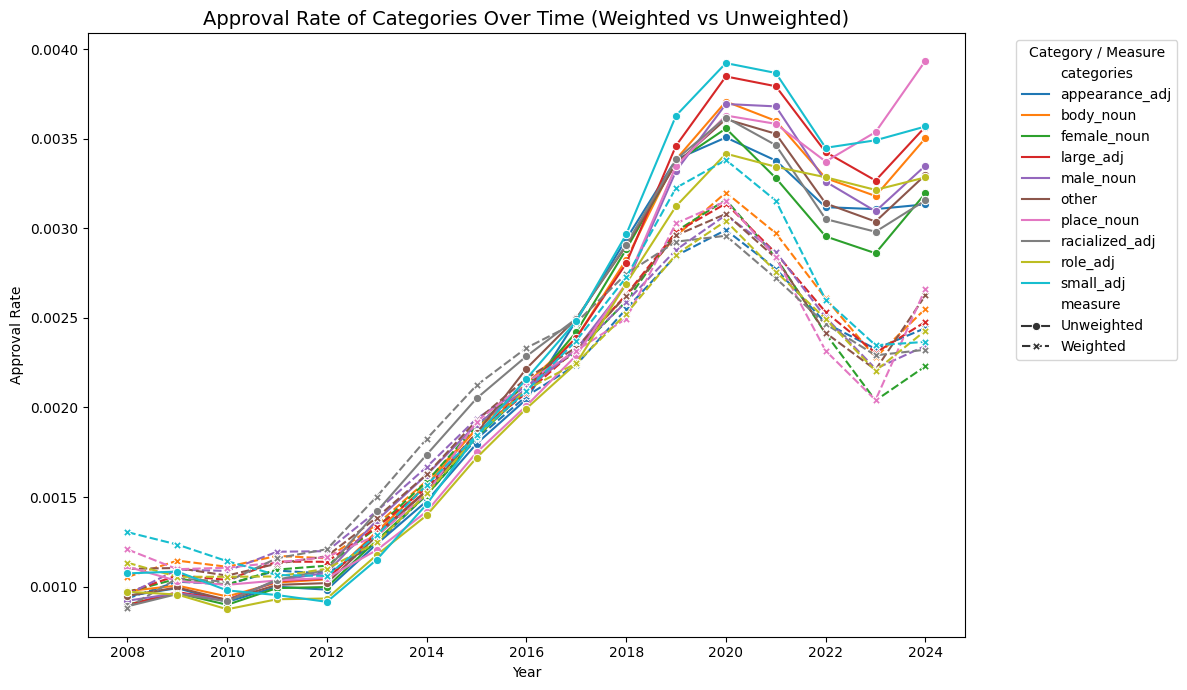

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

engage_stats_time = (
    pair_exploded.groupby(["year", "categories"])
    .agg(
        avg_approval_rate=("approval_rate", "mean"),
        avg_views_per_day=("views_per_day", "mean"),
        avg_upvotes_per_day=("upvotes_per_day", "mean"),
        count=("title_id", "count"),  # optional: number of videos
    )
    .reset_index()
)


weighted = (
    pair_exploded.groupby(["year", "categories"])
    .apply(
        lambda g: g["upvotes"].sum() / g["views"].sum()
        if g["views"].sum() > 0
        else None
    )
    .reset_index(name="weighted_approval_rate")
)


engage_stats_time = engage_stats_time.merge(
    weighted, on=["year", "categories"], how="left"
)

engage_stats_time["smoothed_unweighted"] = engage_stats_time.groupby("categories")[
    "avg_approval_rate"
].transform(lambda x: x.rolling(3, min_periods=1).mean())

engage_stats_time["smoothed_weighted"] = engage_stats_time.groupby("categories")[
    "weighted_approval_rate"
].transform(lambda x: x.rolling(3, min_periods=1).mean())


# --- Reshape for plotting ---
plot_df = pd.melt(
    engage_stats_time,
    id_vars=["year", "categories"],
    value_vars=["smoothed_unweighted", "smoothed_weighted"],
    var_name="measure",
    value_name="approval_rate",
)

plot_df["measure"] = plot_df["measure"].map(
    {"smoothed_unweighted": "Unweighted", "smoothed_weighted": "Weighted"}
)

# --- Plot ---
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=plot_df,
    x="year",
    y="approval_rate",
    hue="categories",
    style="measure",  # solid vs dashed
    markers=True,
    dashes=True,
)

plt.title("Approval Rate of Categories Over Time (Weighted vs Unweighted)", fontsize=14)
plt.ylabel("Approval Rate")
plt.xlabel("Year")
plt.legend(title="Category / Measure", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Figure X. Approval rates of adjective–noun categories over time, comparing unweighted (solid lines) and weighted (dashed lines) measures. Both series show a steady rise until 2019–2020, followed by a decline. Weighted approval rates are consistently lower, indicating that high-view videos received proportionally fewer upvotes per view than the average video. The post-2020 downturn is sharper in the unweighted series, suggesting that niche or less-viewed uploads lost approval more strongly than widely viewed content.


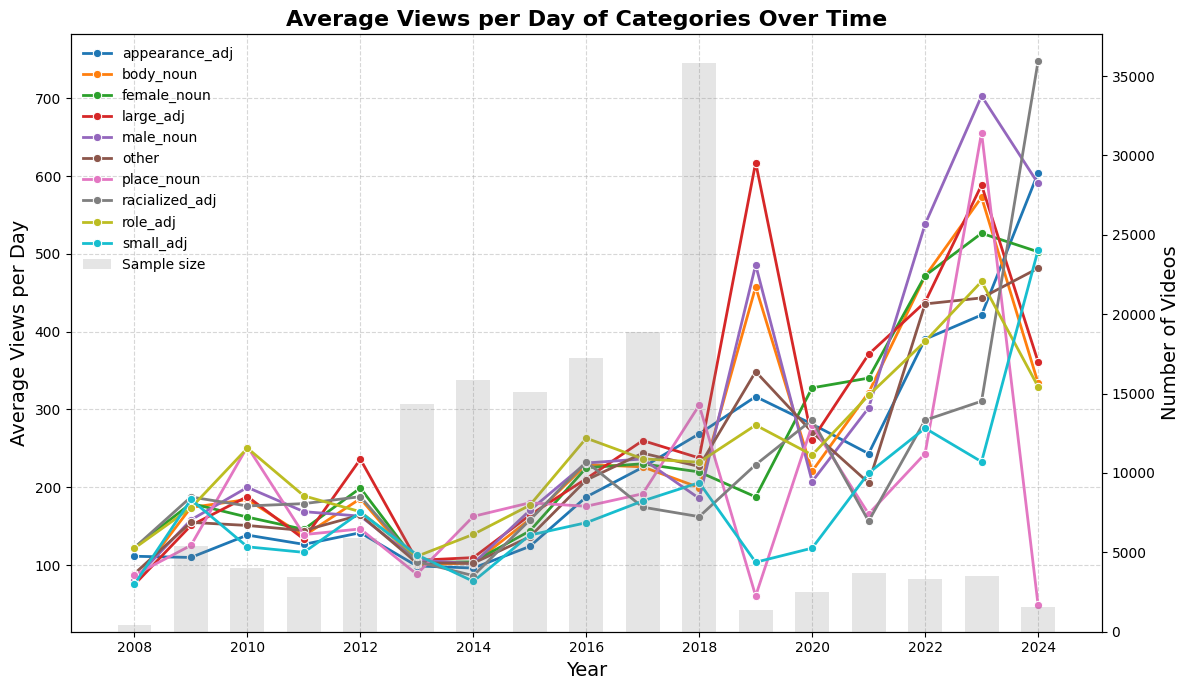

In [74]:
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(
    data=engage_stats_time,
    x="year",
    y="avg_views_per_day",
    hue="categories",
    marker="o",
    linewidth=2,
    palette="tab10",
    ax=ax1,
)

ax1.set_title(
    "Average Views per Day of Categories Over Time", fontsize=16, weight="bold"
)
ax1.set_ylabel("Average Views per Day", fontsize=14)
ax1.set_xlabel("Year", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.5)

# ✅ Force x-axis years to integers
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# --- Secondary axis for sample size ---
ax2 = ax1.twinx()
sample_sizes = engage_stats_time.groupby("year")["count"].sum()

ax2.bar(
    sample_sizes.index,
    sample_sizes.values,
    alpha=0.2,
    color="gray",
    width=0.6,
    label="Sample size",
)
ax2.set_ylabel("Number of Videos", fontsize=14)

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, frameon=False)

plt.tight_layout()
plt.show()


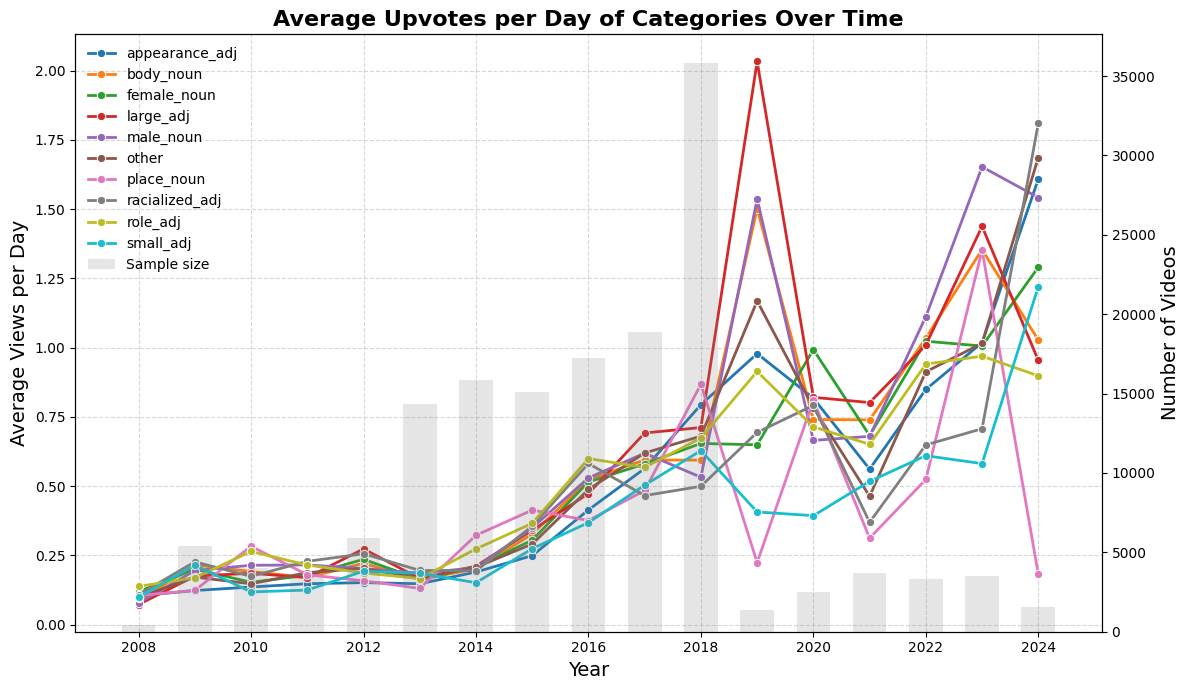

In [75]:
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots(figsize=(12, 7))

# --- Line plot (avg views per day, raw values) ---
sns.lineplot(
    data=engage_stats_time,
    x="year",
    y="avg_upvotes_per_day",
    hue="categories",
    marker="o",
    linewidth=2,
    palette="tab10",
    ax=ax1,
)

ax1.set_title(
    "Average Upvotes per Day of Categories Over Time", fontsize=16, weight="bold"
)
ax1.set_ylabel("Average Views per Day", fontsize=14)
ax1.set_xlabel("Year", fontsize=14)
ax1.grid(True, linestyle="--", alpha=0.5)

# Force x-axis years to integers
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# --- Secondary axis for sample size ---
ax2 = ax1.twinx()
sample_sizes = engage_stats_time.groupby("year")["count"].sum()
ax2.bar(
    sample_sizes.index,
    sample_sizes.values,
    alpha=0.2,
    color="gray",
    width=0.6,
    label="Sample size",
)
ax2.set_ylabel("Number of Videos", fontsize=14)

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, frameon=False)

plt.tight_layout()
plt.show()


Methods

We operationalized approval rate as the ratio of upvotes to views, calculated in two complementary forms. The unweighted approval rate was defined as the mean of per-video ratios, treating each upload equally and capturing the experience of a “typical” video. The weighted approval rate was defined as the ratio of total upvotes to total views within a year and category, giving proportionally greater influence to highly viewed videos and thus reflecting the aggregate experience of audiences. Reporting both allows us to distinguish between content-level and viewer-level engagement, and to identify cases where widely viewed videos diverge from the broader pool of uploads.

Adjective–noun pairs were extracted from video titles using dependency-parsed part-of-speech tags and assigned to semantic categories (e.g., appearance adjectives, racialized adjectives, female nouns) based on predefined lexicons. For each video, we computed engagement metrics including approval rate, views per day, and upvotes per day. To assess longitudinal dynamics, approval rates were aggregated by year and category. To reduce volatility in years with small sample sizes, we applied a three-year rolling average to both weighted and unweighted measures.

The dataset is highly unbalanced across years. The period 2013–2018—particularly 2018, with over 50,000 uploads—accounts for the bulk of the material, whereas 2008–2012 and post-2019 contain substantially fewer videos. This imbalance stabilizes trends in the “fat years” while making early and late periods more sensitive to outliers.

The dataset is highly unbalanced across years. The period 2013–2018—particularly 2018, with over 50,000 uploads—accounts for the bulk of the material, whereas 2008–2012 and post-2019 contain substantially fewer videos. This imbalance stabilizes trends in the “fat years” while making early and late periods more sensitive to outliers.

Discussion

The distinction between weighted and unweighted approval rates highlights important differences in audience reception. Weighted measures capture the dominant experience of viewers and suggest that highly visible content has been consistently evaluated more critically. Unweighted measures, meanwhile, reveal that smaller or niche videos often achieve higher proportional approval, but are more affected by sample size volatility.

The systemic dip in approval rates after 2020 appears across categories, but its severity depends on the metric. That the decline is less pronounced in weighted estimates suggests that popular videos retained approval while less visible uploads experienced disproportionate losses. This divergence points to a possible stratification of audience engagement: mass-audience content stabilized, while niche material became more vulnerable to negative or indifferent reception.

Given the dataset’s temporal imbalance, caution is warranted when interpreting early and late periods. Years with large sample sizes (2013–2018) provide robust evidence of long-term trends, whereas years with few uploads (2008–2012, post-2019) are more susceptible to outlier effects. Nonetheless, the convergence of both weighted and unweighted metrics on a rising trajectory until 2019, followed by a downturn, suggests that the observed patterns reflect genuine shifts in audience behavior rather than statistical noise alone.


#### Syntactic roles
Test if titles where women appear as passive subjects or direct objects correlate with higher audience approval.


In [76]:
def extract_role_flags(
    df: pd.DataFrame, FEMALE_NOUNS: set, MALE_NOUNS: set
) -> pd.DataFrame:
    """
    For each title, create binary flags indicating whether female or male nouns
    appear as subject, passive subject, or direct object.

    Returns: DataFrame with one row per title_id and role flags.
    """
    records = []

    for idx, parsed in (
        df[["title_id", "pos_title_with_deps"]].dropna().itertuples(index=False)
    ):
        roles = {
            "female_subject": 0,
            "female_passive": 0,
            "female_object": 0,
            "male_subject": 0,
            "male_passive": 0,
            "male_object": 0,
        }

        for token, pos, dep in parsed:
            dep = dep.lower()
            dep = "dobj" if dep == "obj" else dep  # normalize obj → dobj
            token_lower = token.lower()

            if dep == "nsubj":
                if token_lower in FEMALE_NOUNS:
                    roles["female_subject"] = 1
                elif token_lower in MALE_NOUNS:
                    roles["male_subject"] = 1
            elif dep == "nsubjpass":
                if token_lower in FEMALE_NOUNS:
                    roles["female_passive"] = 1
                elif token_lower in MALE_NOUNS:
                    roles["male_passive"] = 1
            elif dep == "dobj":
                if token_lower in FEMALE_NOUNS:
                    roles["female_object"] = 1
                elif token_lower in MALE_NOUNS:
                    roles["male_object"] = 1

        roles["title_id"] = idx
        records.append(roles)

    return pd.DataFrame(records)


In [77]:
pair_exploded.columns

Index(['adj', 'noun', 'pair', 'categories', 'views', 'upvotes',
       'approval_rate', 'views_per_day', 'upvotes_per_day', 'title_id',
       'days_since', 'year', 'pos_title_with_deps'],
      dtype='object')

In [78]:
# How many videos per role
print(role_df["female_passive"].value_counts())
print(role_df["female_object"].value_counts())

# Compare distributions, not just means
role_df.groupby("female_passive")["approval_rate"].describe()
role_df.groupby("female_object")["approval_rate"].describe()


KeyError: 'female_passive'

In [ ]:
role_df

,adj,noun,pair,categories,views,upvotes,approval_rate,views_per_day,upvotes_per_day,title_id,days_since,year,pos_title_with_deps,female_subject,female_passive,female_object,male_subject,male_passive,male_object
0,cute,teen,cute teen,appearance_adj,37012.0,78.0,0.002107,14.728213,0.031039,0,2513.0,2018.0,"[(cute, ADJ, amod), (teen, NOUN, compound), (g...",0,0,0,0,0,0
1,cute,teen,cute teen,appearance_adj,37012.0,78.0,0.002107,14.728213,0.031039,0,2513.0,2018.0,"[(cute, ADJ, amod), (teen, NOUN, compound), (g...",0,0,0,0,0,0
2,cute,teen,cute teen,female_noun,37012.0,78.0,0.002107,14.728213,0.031039,0,2513.0,2018.0,"[(cute, ADJ, amod), (teen, NOUN, compound), (g...",0,0,0,0,0,0
3,cute,teen,cute teen,female_noun,37012.0,78.0,0.002107,14.728213,0.031039,0,2513.0,2018.0,"[(cute, ADJ, amod), (teen, NOUN, compound), (g...",0,0,0,0,0,0
4,nice,step,nice step,other,2083844.0,6318.0,0.003032,839.244462,2.544503,1,2483.0,2018.0,"[(reali, PROPN, amod), (nice, ADJ, amod), (ste...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335133,big,tit,big tit,female_noun,44400.0,78.0,0.001757,9.857904,0.017318,256012,4504.0,2013.0,"[(shoot, VERB, ROOT), (creami, PROPN, compound...",0,0,0,0,0,0
335134,big,tit,big tit,body_noun,44400.0,78.0,0.001757,9.857904,0.017318,256012,4504.0,2013.0,"[(shoot, VERB, ROOT), (creami, PROPN, compound...",0,0,0,0,0,0
335135,big,tit,big tit,body_noun,44400.0,78.0,0.001757,9.857904,0.017318,256012,4504.0,2013.0,"[(shoot, VERB, ROOT), (creami, PROPN, compound...",0,0,0,0,0,0
335136,big,tit,big tit,body_noun,44400.0,78.0,0.001757,9.857904,0.017318,256012,4504.0,2013.0,"[(shoot, VERB, ROOT), (creami, PROPN, compound...",0,0,0,0,0,0


#### Network centrality:

Examine whether adjectives with high degree/weighted centrality are associated with higher average views, suggesting that users favor semantically anchored descriptors.


#### Contextual framing:

Analyze engagement for titles referencing exoticized or public locations (e.g., in public, at hotel) versus neutral/domestic settings. -->
